In [1]:
### Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

#Import Libraries
# To Scale the data
from sklearn.preprocessing import MinMaxScaler,StandardScaler

import statsmodels.api as sm
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor


# To build the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
from sklearn import linear_model

import os
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data from csv
housesale_df = pd.read_csv('train.csv')
housesale_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
housesale_df.shape

(1460, 81)

In [4]:
housesale_df.drop_duplicates(subset ="Id",keep = False, inplace = True)

In [5]:
housesale_df.shape

(1460, 81)

### There is no duplicates in the dataset.
- Column Id has no relevance to the analysis. SO dropping the column

In [6]:
housesale_df.drop('Id',axis=1,inplace=True)

### Check for any missing data

In [7]:
missing_per = housesale_df.isnull().sum()/len(housesale_df)*100
missing_per[missing_per>0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

### Drop the columns which have missing values >15%
- Eventhough LotFrontage looks good predictor with 17% missing values, imputing the column may lead to bias 

In [8]:
Colstodrop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','LotFrontage']
housesale_df.drop(columns=Colstodrop,axis=1,inplace=True)
housesale_df.shape

(1460, 74)

- The columns with equal number of missing values represents the houses with 'NO Garage'.

In [9]:
housesale_df['GarageType'].fillna(axis='rows', inplace=True,value='No Garage')
housesale_df['GarageYrBlt'].fillna(axis='rows', inplace=True,value=0)
housesale_df['GarageFinish'].fillna(axis='rows', inplace=True,value='No Garage')
housesale_df['GarageQual'].fillna(axis='rows', inplace=True,value='No Garage')
housesale_df['GarageCond'].fillna(axis='rows', inplace=True,value='No Garage')

- The columns with equal number of missing values represents the houses with 'NO Basement'. Hence doesnot make sense in impute the values with it, as the basement column are not adding value if there is no basement.

In [10]:
housesale_df['BsmtCond'].fillna(axis='rows', inplace=True,value='No Basement')
housesale_df['BsmtQual'].fillna(axis='rows', inplace=True,value='No Basement')
housesale_df['BsmtExposure'].fillna(axis='rows', inplace=True,value='No Basement')
housesale_df['BsmtFinType1'].fillna(axis='rows', inplace=True,value='No Basement')
housesale_df['BsmtFinType2'].fillna(axis='rows', inplace=True,value='No Basement')

- The columns MasVnrArea,MasVnrType has no data - replicates to None category i.e. imputing with None. So imputing with Mode for Electrical

In [11]:
housesale_df['MasVnrType'].fillna(axis='rows', inplace=True,value='None')
housesale_df['MasVnrArea'].fillna(axis='rows', inplace=True,value=0)
housesale_df.Electrical.fillna(housesale_df.Electrical.mode()[0],inplace=True)

In [12]:
missing_data = housesale_df.isnull().sum()/len(housesale_df)*100
missing_data[missing_data>0].sort_values(ascending=False)

Series([], dtype: float64)

In [13]:
housesale_df.shape

(1460, 74)

#### Create features from the variables

In [14]:
# Creating derived features
# Converting dates (YearBuilt, YearRemodAdd, GarageYrBlt) to days (DiffYearBuilt, DiffYearRemodAdd, DiffGarageYrBlt) from today
housesale_df['BuiltBefore_Years'] = pd.datetime.now().year - housesale_df['YearBuilt']
housesale_df['RemodAddBefore_Years'] = pd.datetime.now().year - housesale_df['YearRemodAdd']
housesale_df['GarageYrBltBefore_Years'] = pd.datetime.now().year - housesale_df['GarageYrBlt']

In [15]:
housesale_df['GarageYrBltBefore_Years'] = housesale_df['GarageYrBltBefore_Years'].astype('int64')

In [16]:
housesale_df['GarageYrBltBefore_Years'].replace({2020:0},inplace=True)

In [17]:
# Remove the old year columns
housesale_df.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt'],axis=1,inplace=True)

- Check for any column with single value

In [18]:
n = housesale_df.nunique(axis=0) 
print("No.of.unique values in each column :\n", n)

No.of.unique values in each column :
 MSSubClass                   15
MSZoning                      5
LotArea                    1073
Street                        2
LotShape                      4
                           ... 
SaleCondition                 6
SalePrice                   663
BuiltBefore_Years           112
RemodAddBefore_Years         61
GarageYrBltBefore_Years      98
Length: 74, dtype: int64


In [19]:
n[n==0]

Series([], dtype: int64)

- Every column has more than 1 distinct value

In [20]:
housesale_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MSSubClass               1460 non-null   int64  
 1   MSZoning                 1460 non-null   object 
 2   LotArea                  1460 non-null   int64  
 3   Street                   1460 non-null   object 
 4   LotShape                 1460 non-null   object 
 5   LandContour              1460 non-null   object 
 6   Utilities                1460 non-null   object 
 7   LotConfig                1460 non-null   object 
 8   LandSlope                1460 non-null   object 
 9   Neighborhood             1460 non-null   object 
 10  Condition1               1460 non-null   object 
 11  Condition2               1460 non-null   object 
 12  BldgType                 1460 non-null   object 
 13  HouseStyle               1460 non-null   object 
 14  OverallQual             

### Conversion of datatypes¶
- MSSubClass, MoSold, YrSold, OverallCond,OverallQual- are categorical columns.

In [21]:
num_to_categ_features = ['MSSubClass', 'OverallCond','OverallQual', 'YrSold', 'MoSold']
housesale_df[num_to_categ_features] = housesale_df[num_to_categ_features].astype('object')

### Categorise the features to numeric and category

In [22]:
housesale_df._get_numeric_data().columns

Index(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'BuiltBefore_Years',
       'RemodAddBefore_Years', 'GarageYrBltBefore_Years'],
      dtype='object')

In [23]:
numeric_cols = housesale_df._get_numeric_data().columns
numeric_cols.drop('SalePrice')

Index(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'BuiltBefore_Years',
       'RemodAddBefore_Years', 'GarageYrBltBefore_Years'],
      dtype='object')

In [24]:
Category_cols = list(housesale_df.loc[:, housesale_df.dtypes == object].columns)

In [25]:
len(numeric_cols)

31

In [26]:
len(Category_cols)

43

In [27]:
ord_cat_col = ['ExterQual','BsmtQual','BsmtCond','BsmtExposure',
               'HeatingQC','CentralAir','KitchenQual','GarageQual',
               'GarageCond','ExterCond','OverallQual', 'OverallCond']


nom_cat_col = ['MSSubClass', 'MSZoning', 'Street',  'LandContour', 'Utilities', 'LotConfig', 
           'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle',
           'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',  'LandSlope','LotShape',
           'Foundation', 'Heating','Electrical','Functional', 'BsmtFinType1','BsmtFinType2',
           'GarageType','GarageFinish','PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
out_col = 'SalePrice'

In [28]:
len(ord_cat_col)

12

In [29]:
len(nom_cat_col)

31

### Exploratory Data Analysis and Data tidying
- I noticed that the dataset consists of 31 numerical columns, 43 categorical variables of 81 all.
- Nominal - 31
- Ordinal - 12

- The prediction target is 'SalePrice'. Let's look closer to this column.

In [30]:
# Function for Analysis of Numerical column
def numeric_col_eda(i, col_i,col_o):
    plt.figure(i)
    sns.jointplot(x=col_i, y=col_o, data=housesale_df[[col_i,col_o]],kind='reg')
def numericdist_col_eda(i, col_i):
    plt.figure(i)
    #sns.distplot(housesale_df[[col_i]])
    sns.boxplot( y=housesale_df[col_i] )
# Function for Analysis of Categorical column #reference from web
def category_col_eda(i, col_i,col_o):
    plt.figure(i)
    var = housesale_df[[col_i]].nunique()
    plt.figure(figsize=(var,var/1.77))
    my_order = housesale_df[[col_i,col_o]].groupby(by=[col_i])[col_o].median().sort_values(ascending=True)
    sns.boxplot(x=col_i, y=col_o, data=housesale_df[[col_i,col_o]], order=my_order.index)

- Check for skewness

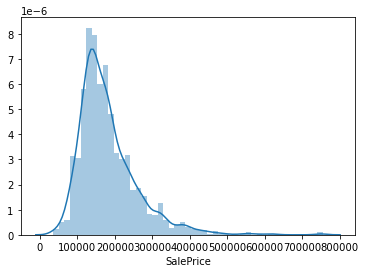

In [31]:
sns.distplot(housesale_df["SalePrice"])

In [32]:
housesale_df["SalePrice"] = np.log(housesale_df["SalePrice"])

In [33]:
df_skew = housesale_df[numeric_cols].skew(axis = 0, skipna = True)
df_skew.sort_values(ascending=False)

MiscVal                    24.476794
PoolArea                   14.828374
LotArea                    12.207688
3SsnPorch                  10.304342
LowQualFinSF                9.011341
KitchenAbvGr                4.488397
BsmtFinSF2                  4.255261
ScreenPorch                 4.122214
BsmtHalfBath                4.103403
EnclosedPorch               3.089872
MasVnrArea                  2.677616
OpenPorchSF                 2.364342
BsmtFinSF1                  1.685503
WoodDeckSF                  1.541376
TotalBsmtSF                 1.524255
1stFlrSF                    1.376757
GrLivArea                   1.366560
BsmtUnfSF                   0.920268
2ndFlrSF                    0.813030
TotRmsAbvGrd                0.676341
HalfBath                    0.675897
Fireplaces                  0.649565
BuiltBefore_Years           0.613461
BsmtFullBath                0.596067
GarageYrBltBefore_Years     0.574639
RemodAddBefore_Years        0.503562
BedroomAbvGr                0.211790
G

LotArea
12.195142125084478


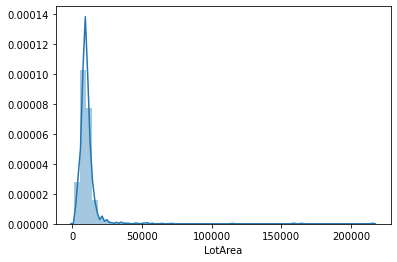

MasVnrArea
2.6748646898037354


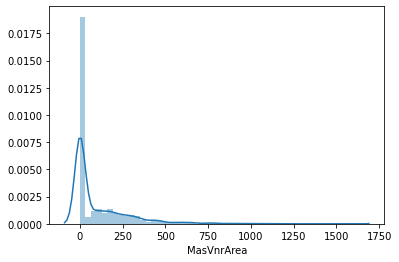

BsmtFinSF1
1.6837708962341815


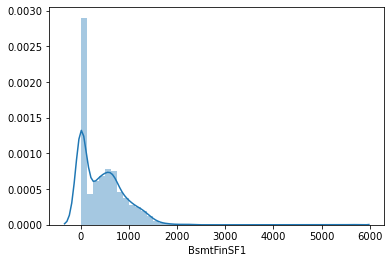

BsmtFinSF2
4.250888017057445


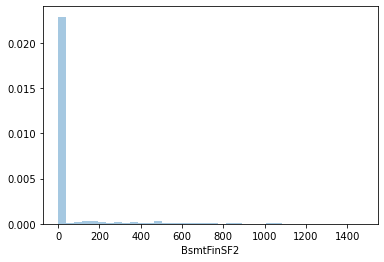

BsmtUnfSF
0.9193227015582005


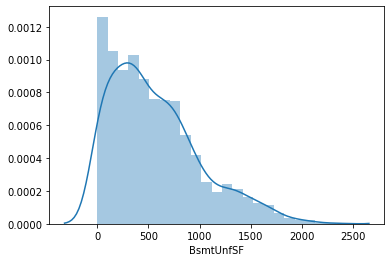

TotalBsmtSF
1.522688086978629


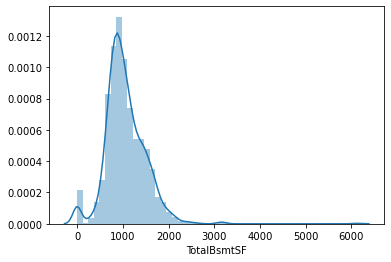

1stFlrSF
1.3753417421837937


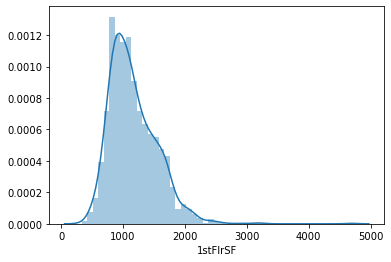

2ndFlrSF
0.8121942731961613


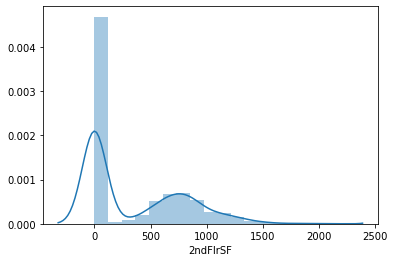

LowQualFinSF
9.002080417658552


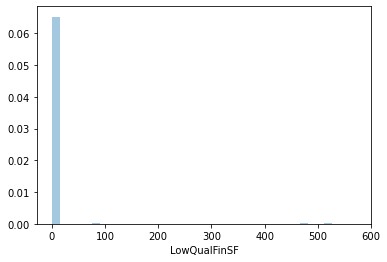

GrLivArea
1.365155954773434


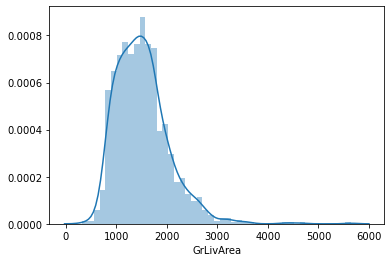

BsmtFullBath
0.5954540376067279


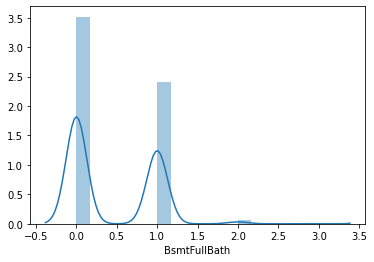

BsmtHalfBath
4.0991856695420035


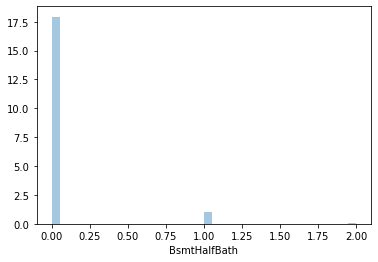

FullBath
0.0365239844325461


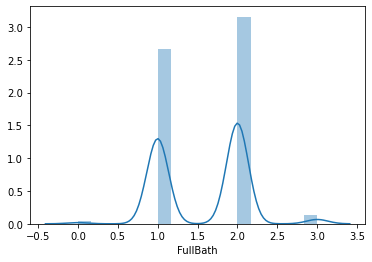

HalfBath
0.6752028347742616


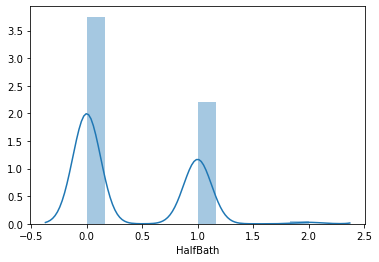

BedroomAbvGr
0.21157244158228097


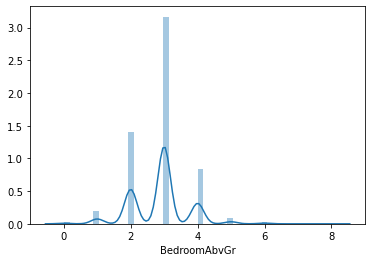

KitchenAbvGr
4.483784093860484


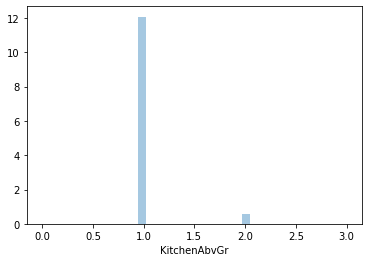

TotRmsAbvGrd
0.6756457673102017


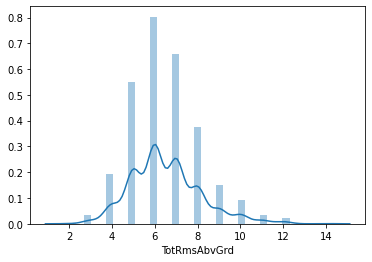

Fireplaces
0.6488976310170327


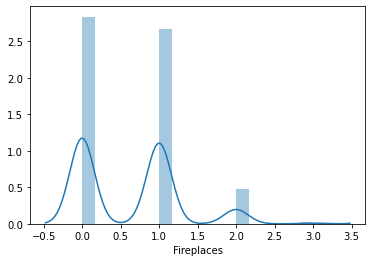

GarageCars
-0.34219689543081294


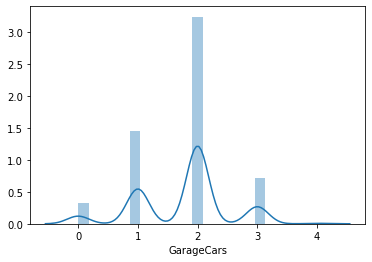

GarageArea
0.1797959420587727


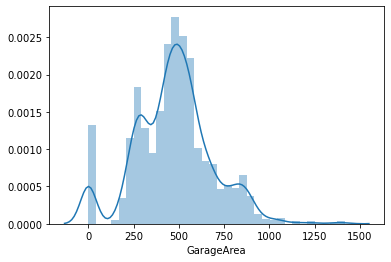

WoodDeckSF
1.5397916998042025


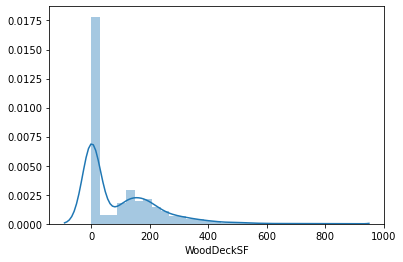

OpenPorchSF
2.361911928568972


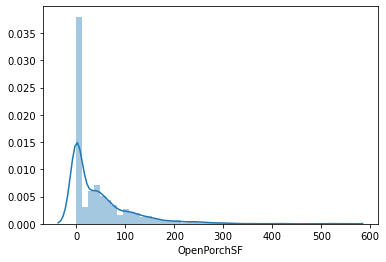

EnclosedPorch
3.086696471376678


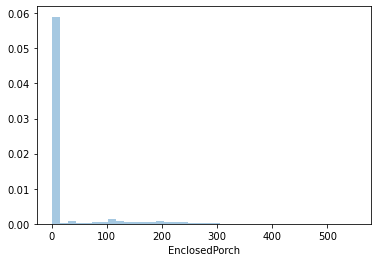

3SsnPorch
10.293752357165413


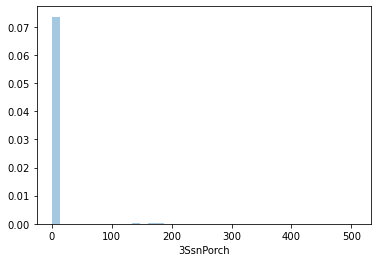

ScreenPorch
4.1179773827954875


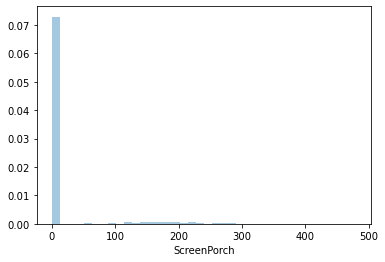

PoolArea
14.813134660429398


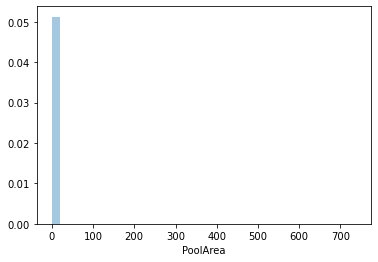

MiscVal
24.4516396173223


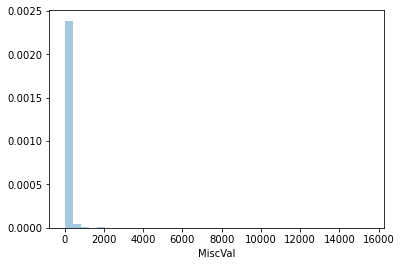

SalePrice
0.1212103673013655


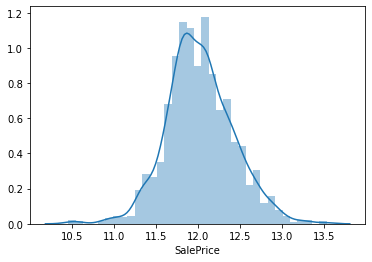

BuiltBefore_Years
0.6128307242029021


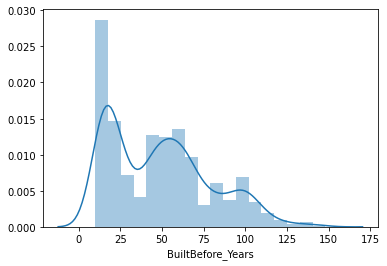

RemodAddBefore_Years
0.5030444967598084


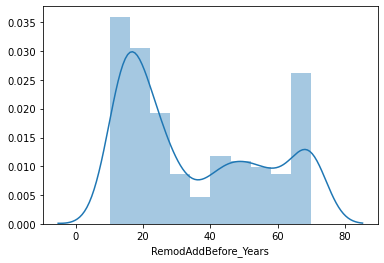

GarageYrBltBefore_Years
0.5740487425433961


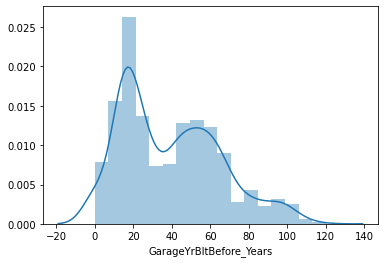

In [34]:
from scipy.stats import skew

for col in numeric_cols:
    print(col)
    print(skew(housesale_df[col]))
    
    plt.figure()
    sns.distplot(housesale_df[col])
    plt.show()

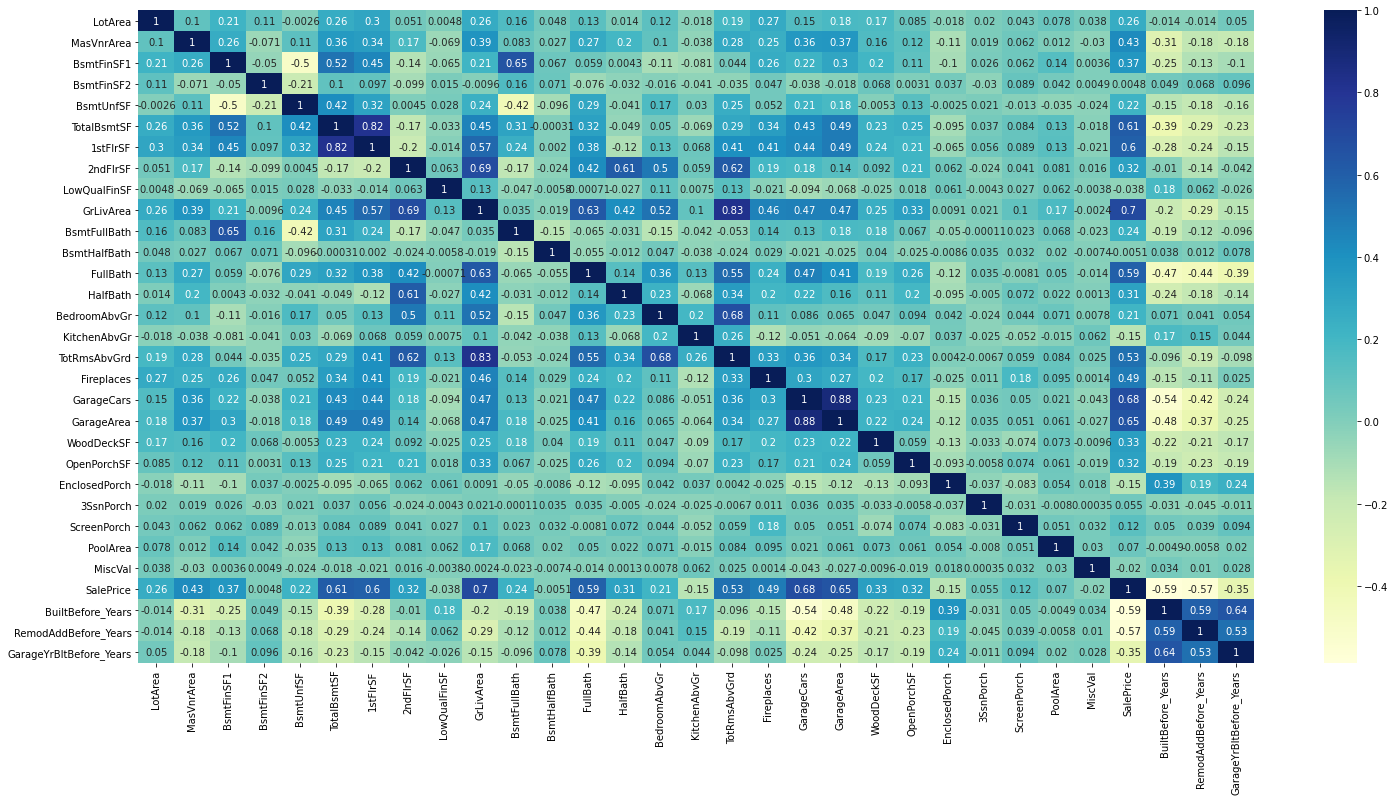

In [35]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(25,12))

# heatmap
sns.heatmap(housesale_df[numeric_cols].corr(), cmap="YlGnBu", annot=True)
plt.show()

In [36]:
low_corr_cols = ['LotArea', 'BsmtFinSF2', 'BsmtUnfSF',
        '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']

In [37]:
housesale_df[low_corr_cols] = np.sqrt(housesale_df[low_corr_cols])

<Figure size 432x288 with 0 Axes>

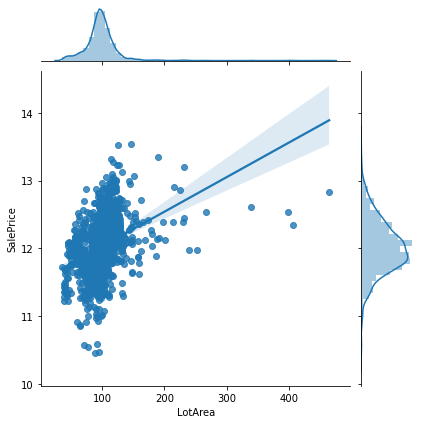

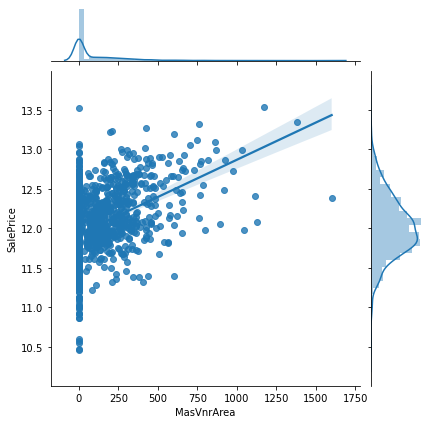

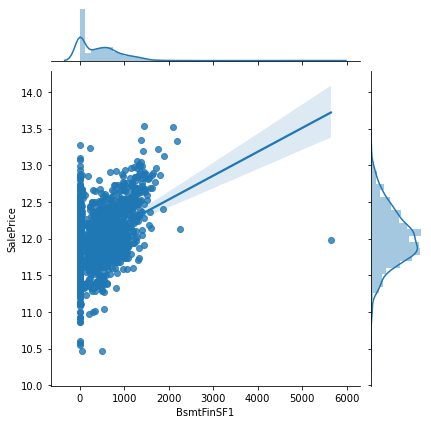

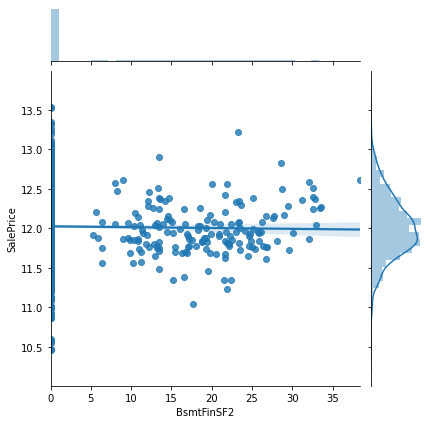

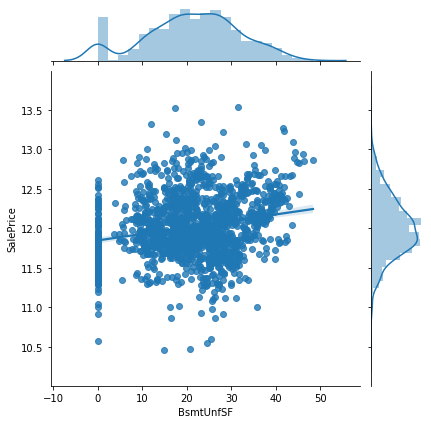

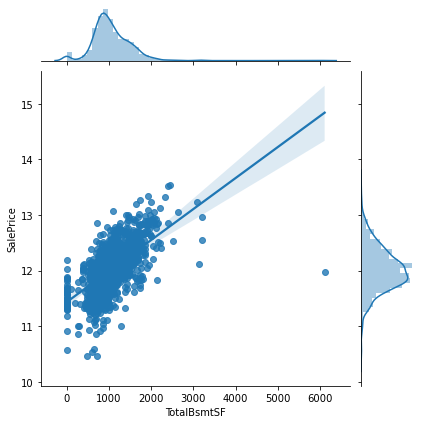

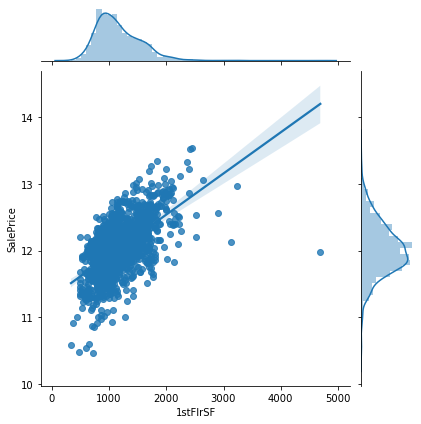

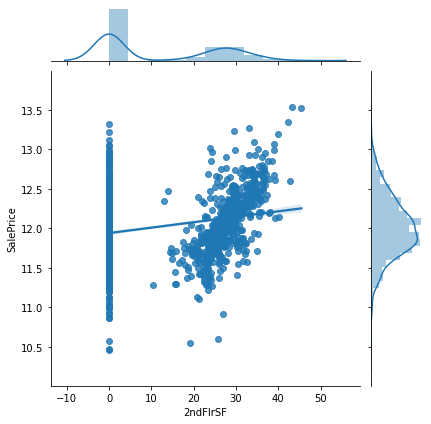

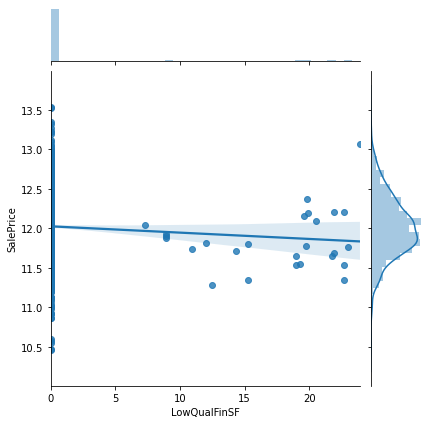

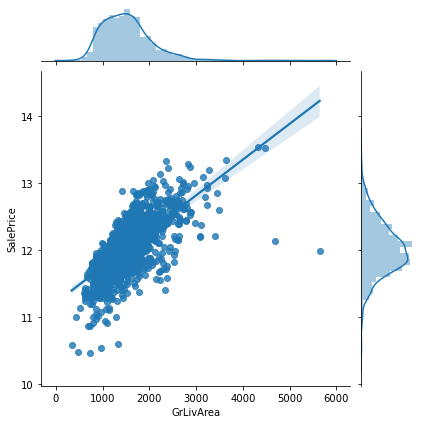

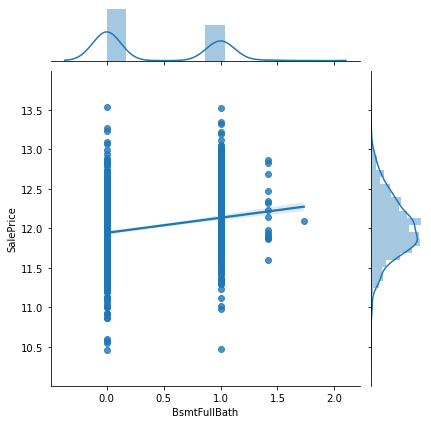

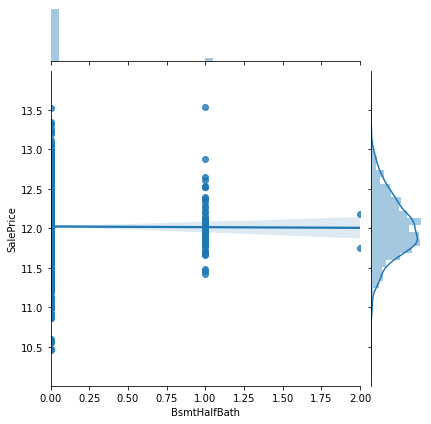

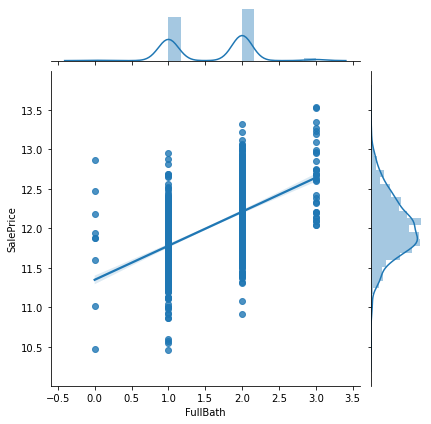

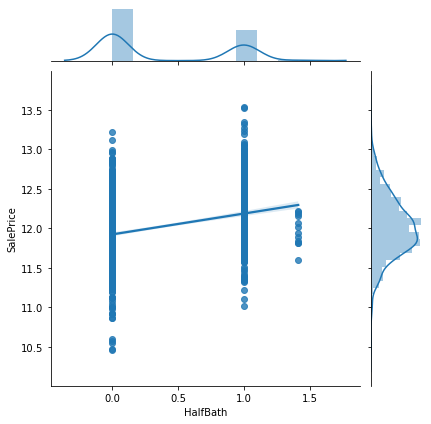

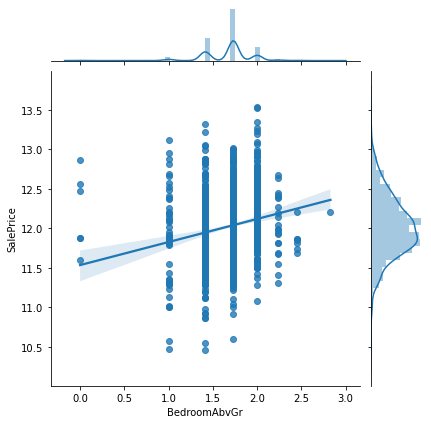

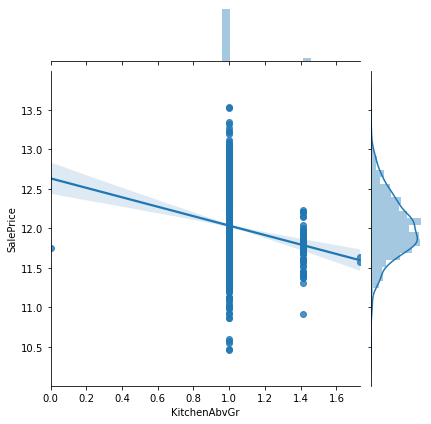

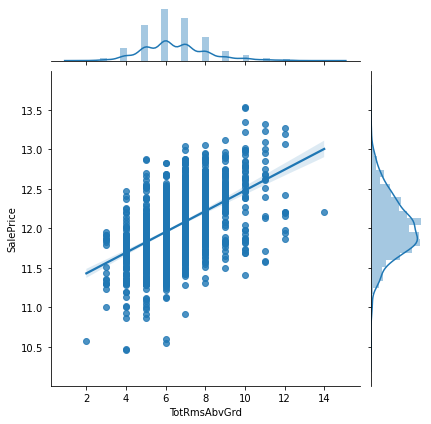

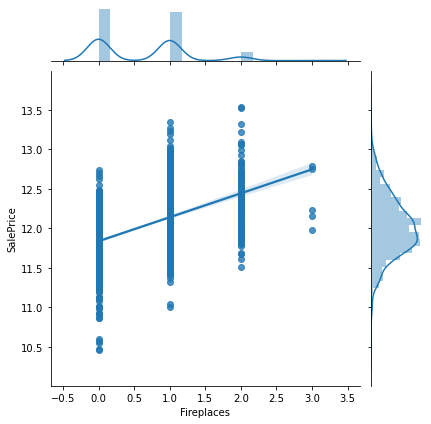

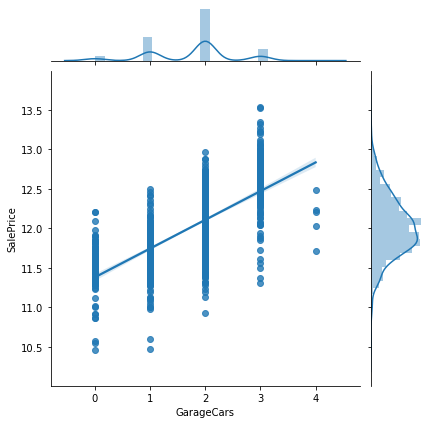

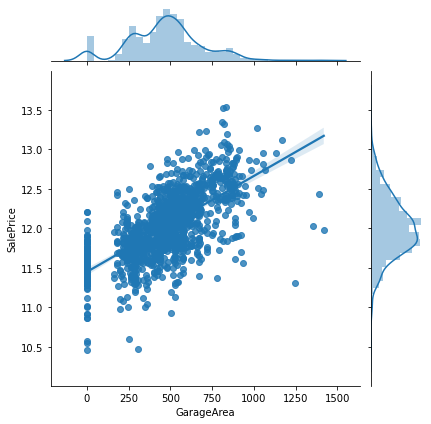

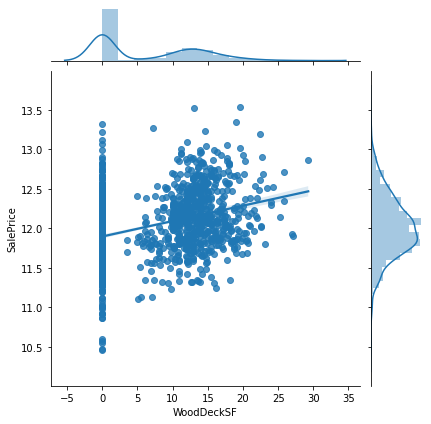

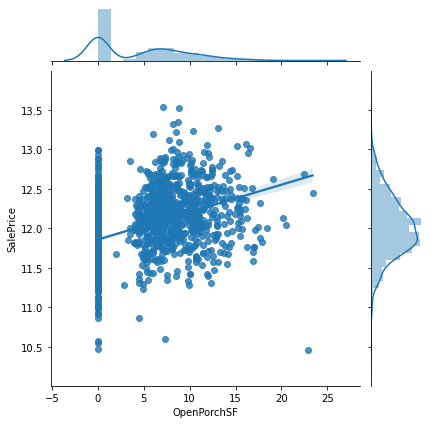

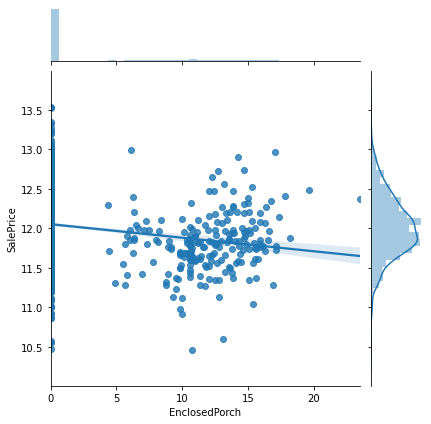

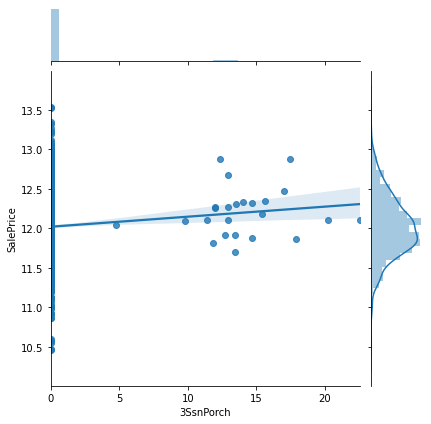

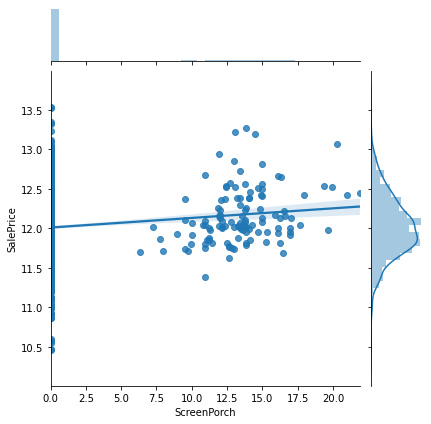

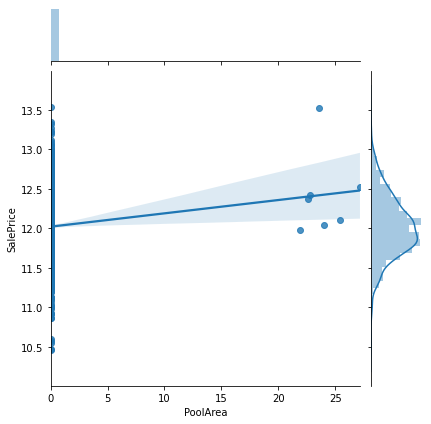

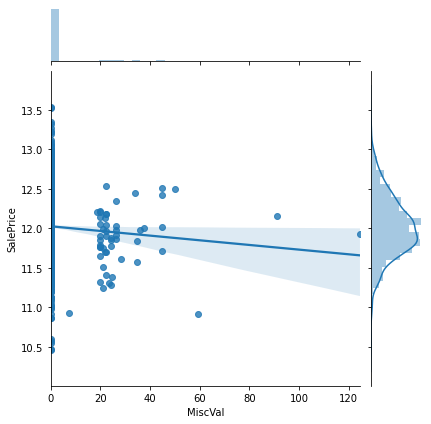

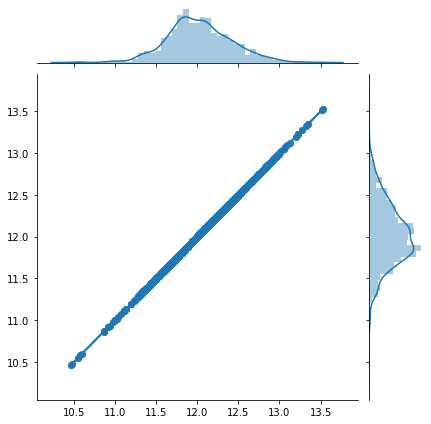

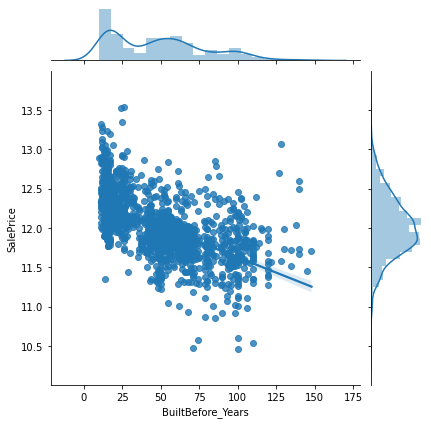

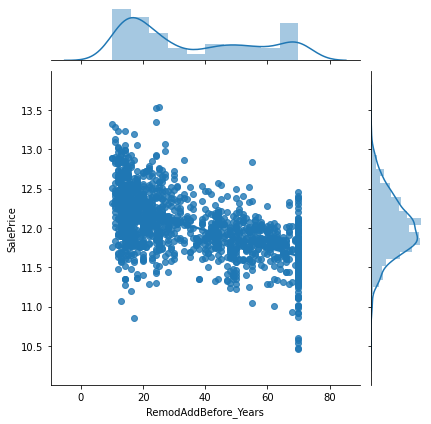

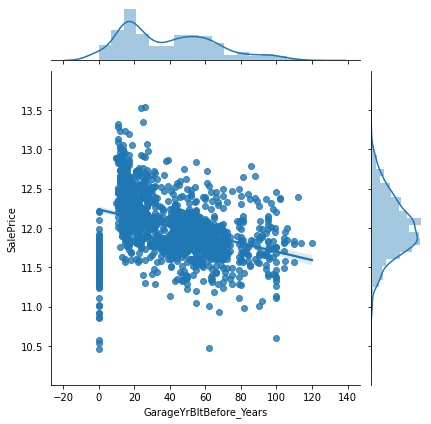

In [38]:
# NUMERICAL COLUMN ANALYSIS
for i, col in enumerate(numeric_cols):
    numeric_col_eda(i, col, out_col)

<Figure size 432x288 with 0 Axes>

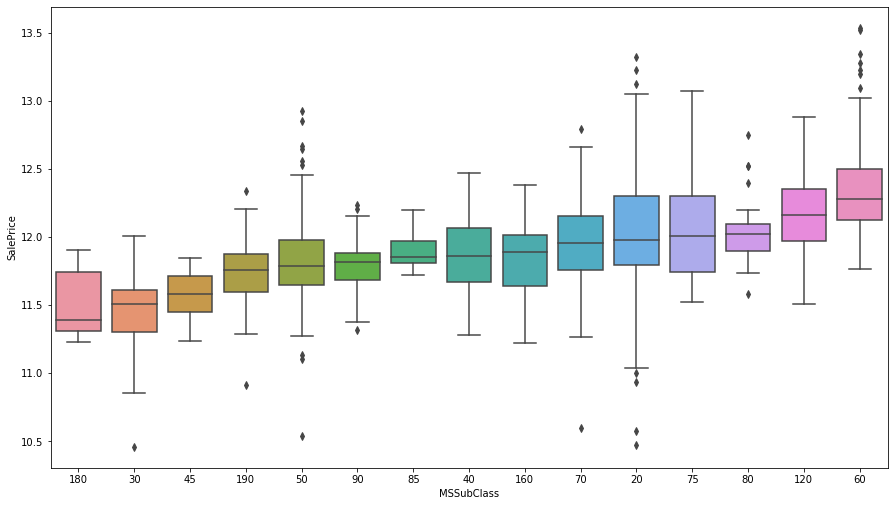

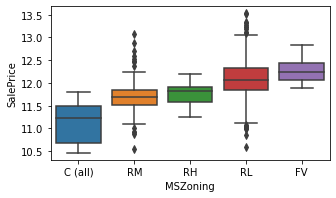

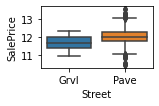

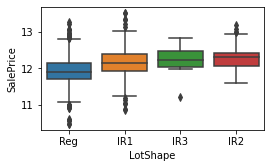

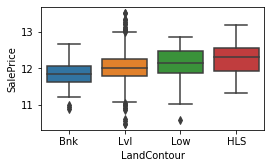

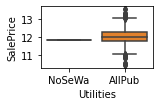

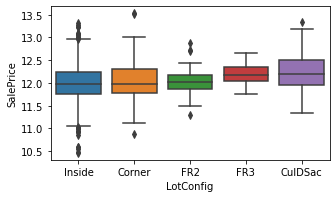

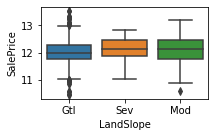

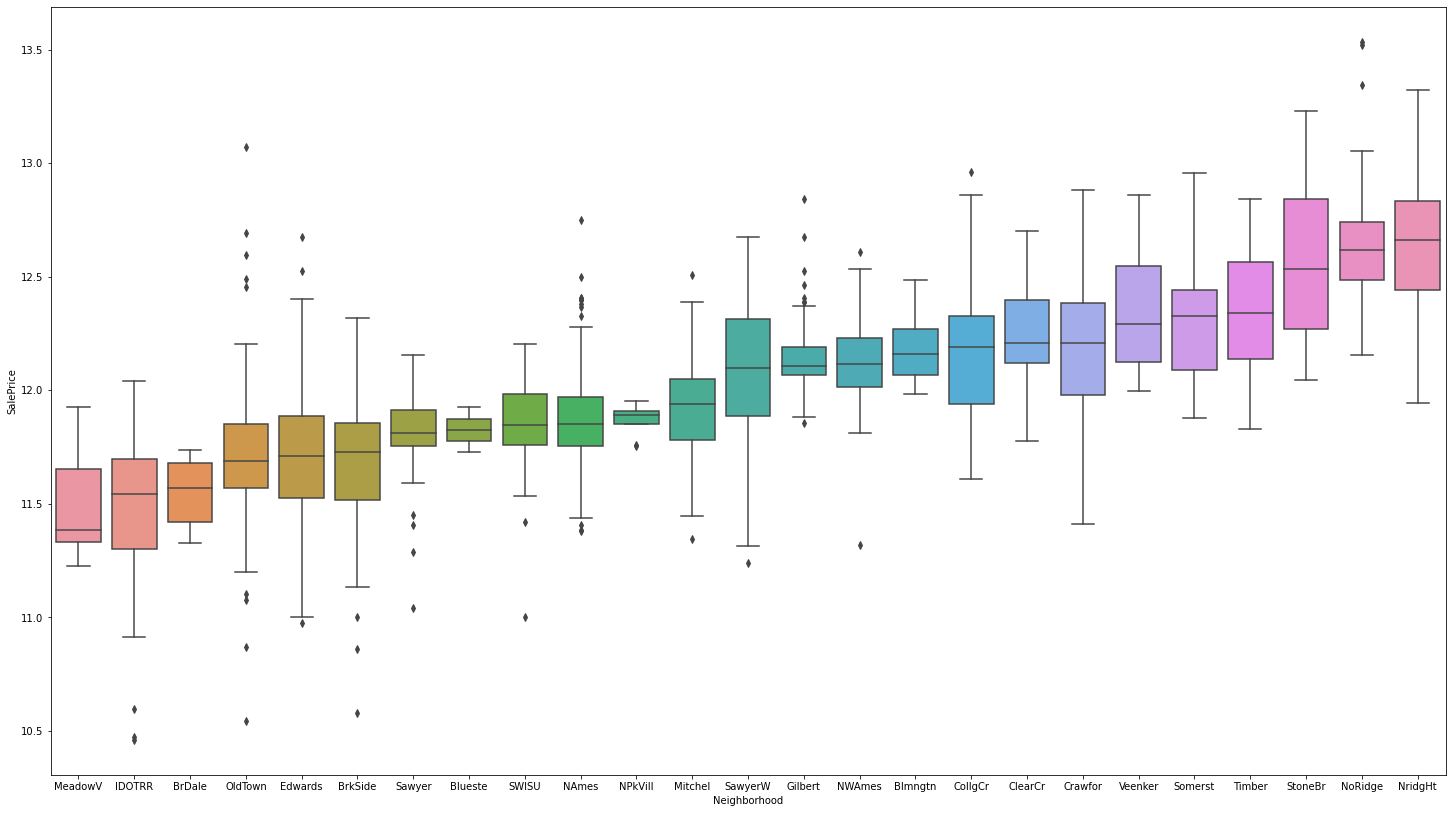

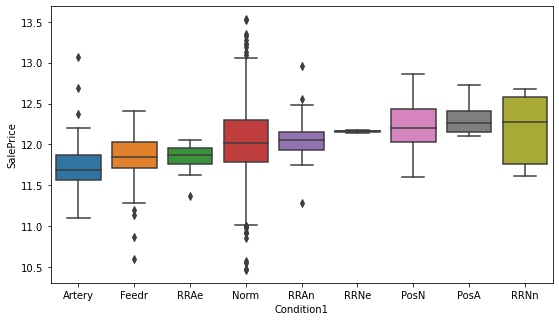

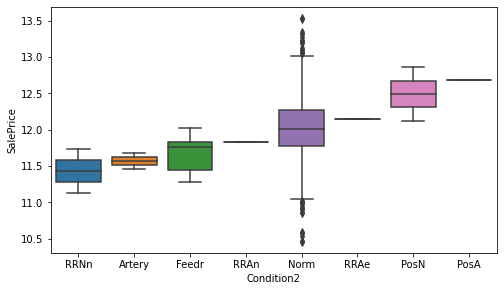

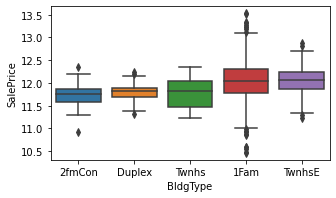

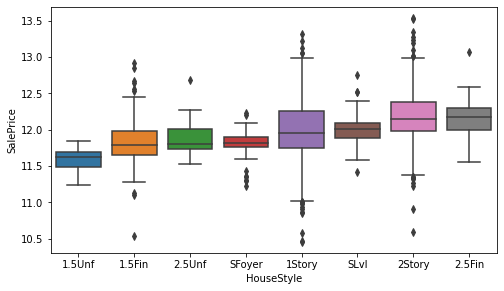

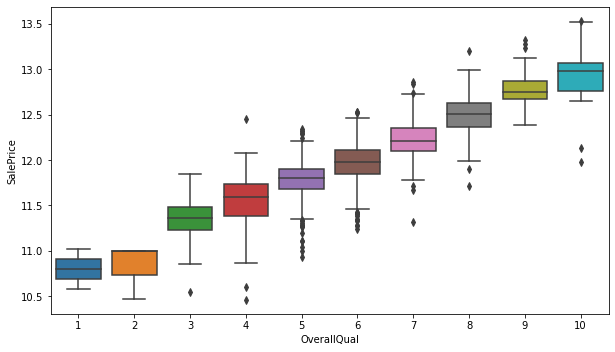

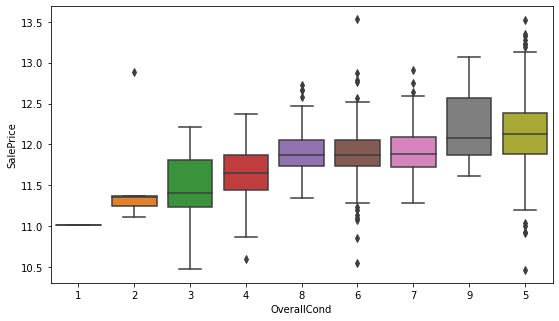

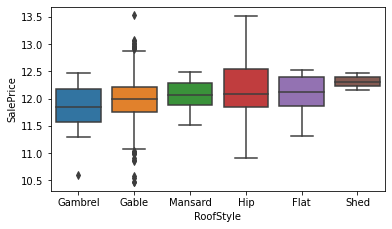

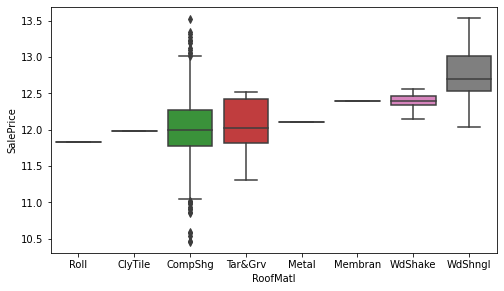

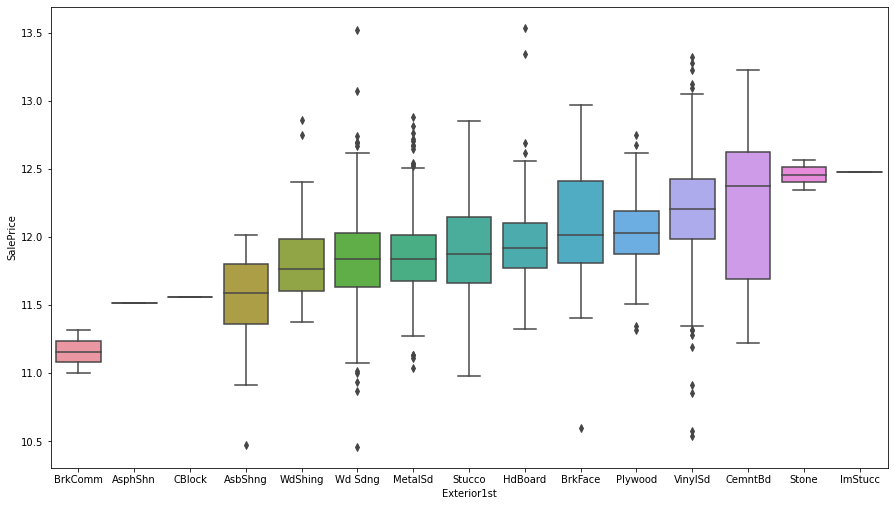

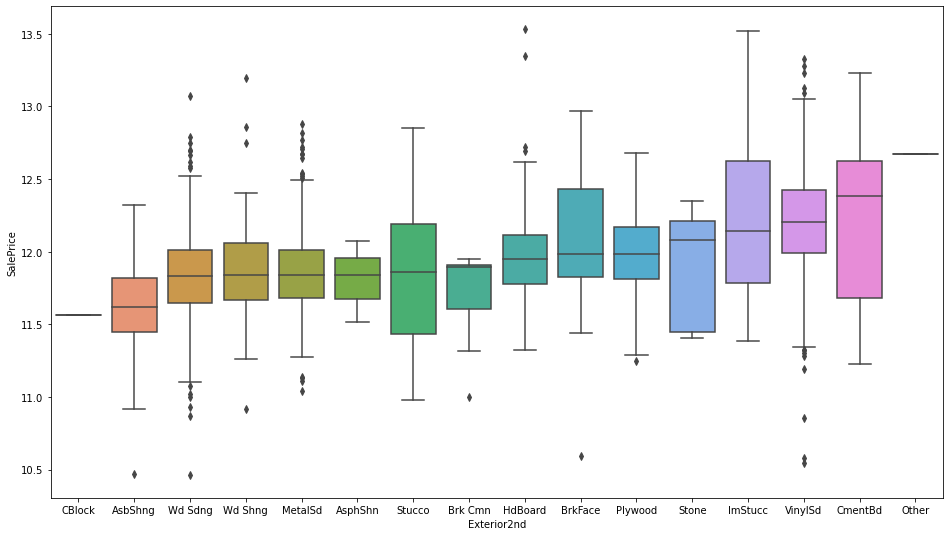

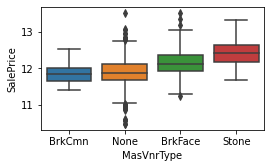

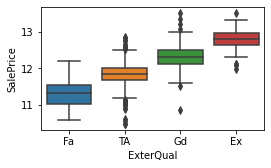

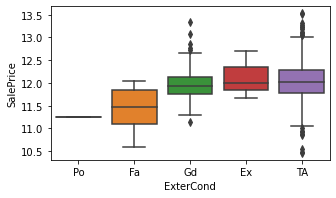

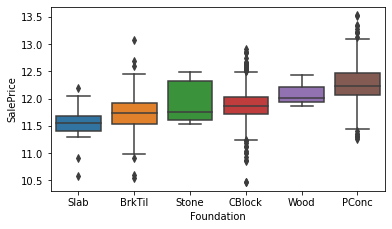

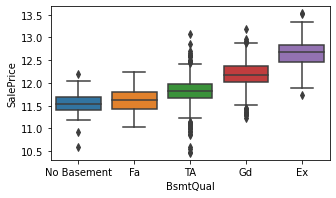

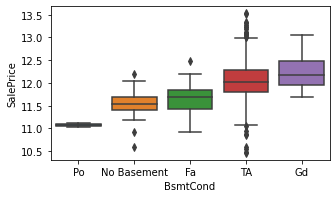

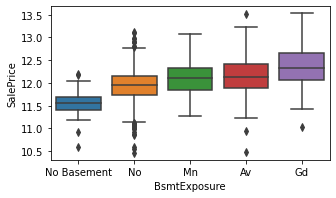

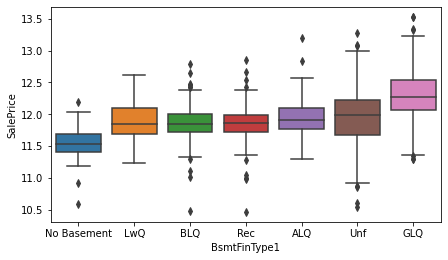

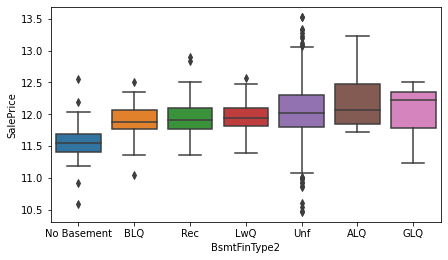

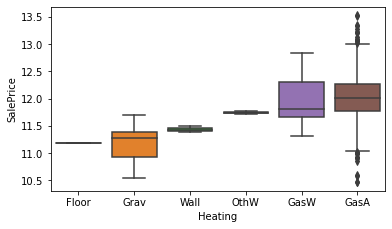

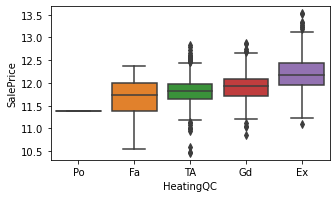

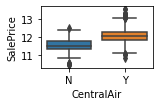

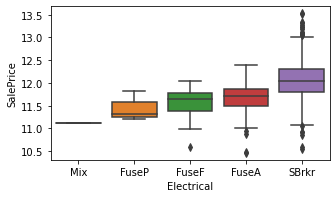

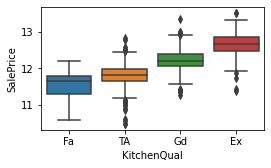

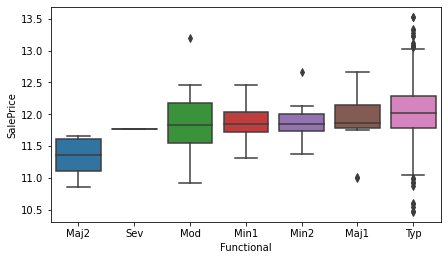

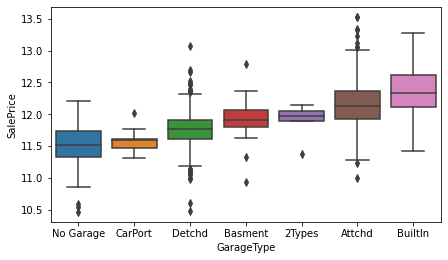

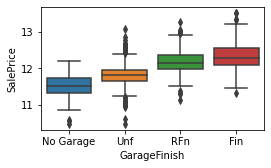

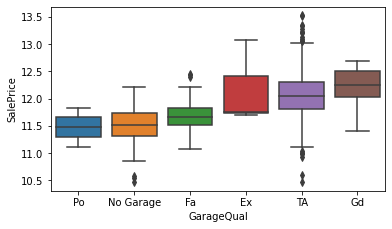

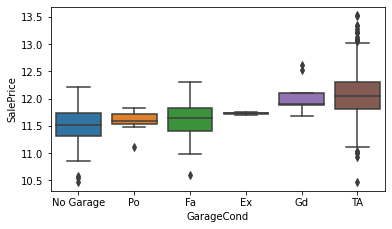

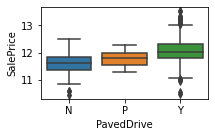

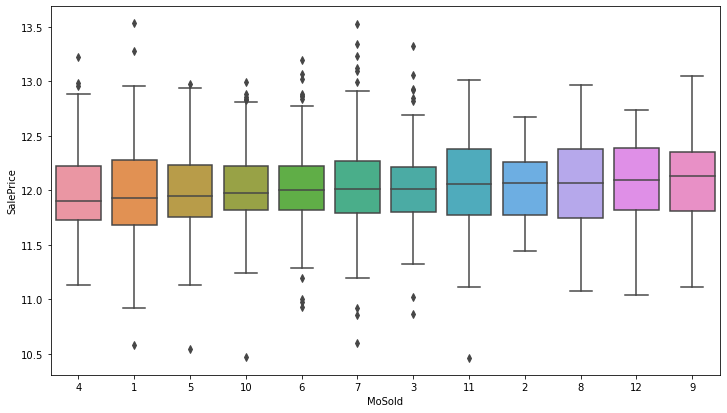

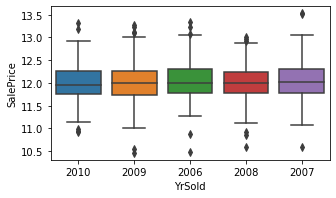

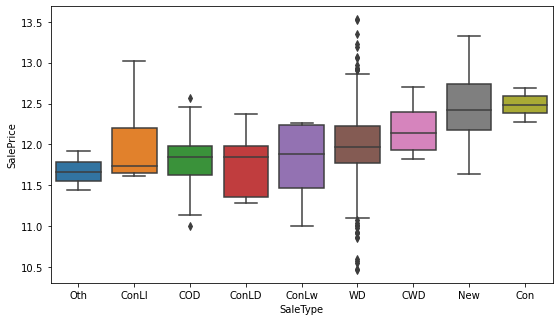

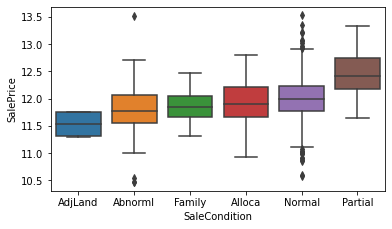

In [39]:
# CATEGORICAL COLUMN ANALYSIS
for i, col in enumerate(Category_cols):
    category_col_eda(i, col, out_col)

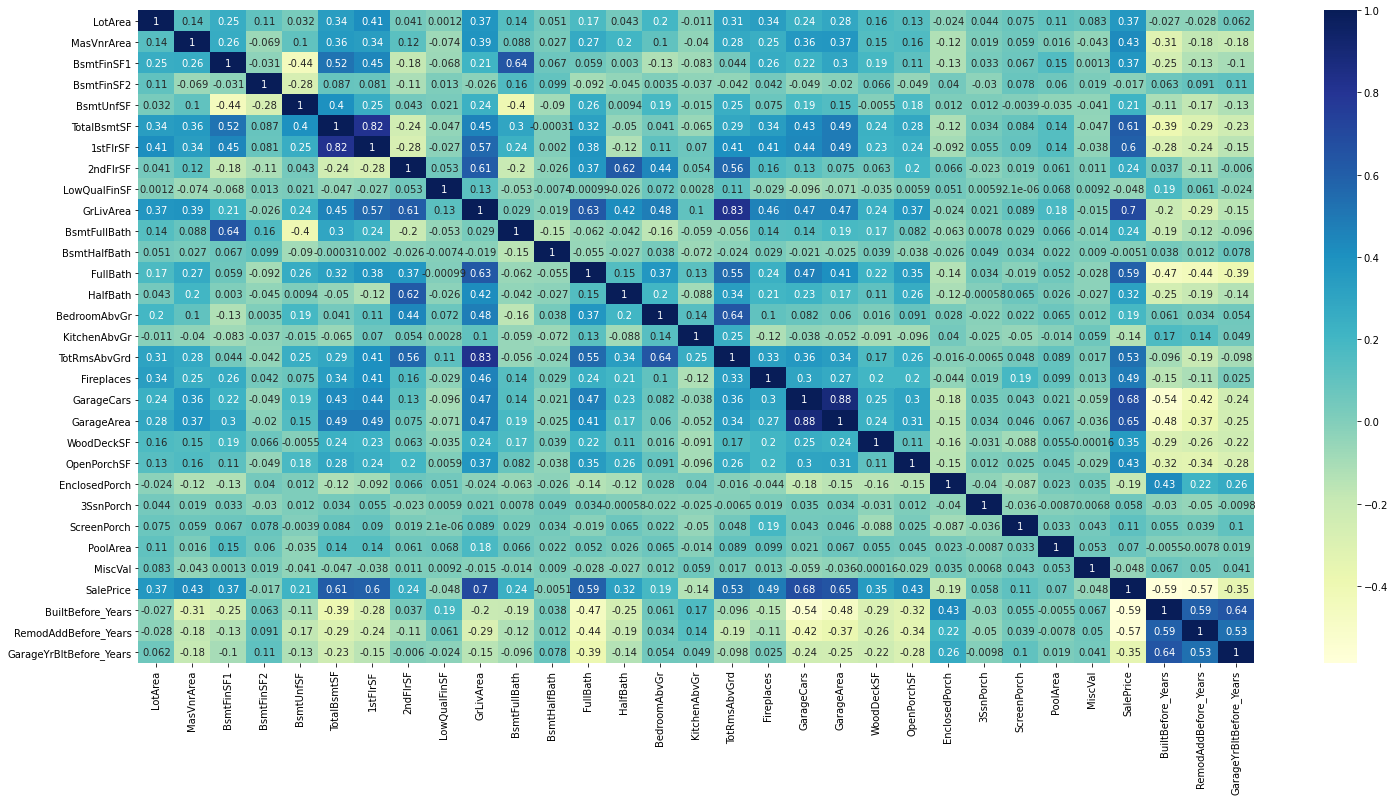

In [40]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(25,12))

# heatmap
sns.heatmap(housesale_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

- TotalBsmtSF is highly correlated to 1stflrSF,2ndflrSF
- GarageArea is highly correlated to Garagecars
- TotRmsAbvGr,BedRoomAbvGr,Fullbath, is highly correlated to GrLivArea
- SalePrice is highly correlated to TotalBsmtSF,1stflrSF,GrLivArea,Garagecars,GarageArea, FullBath,Age of built and remodelling
- Now, let's verify the correlation of SalePrice with above variables using scatter plots

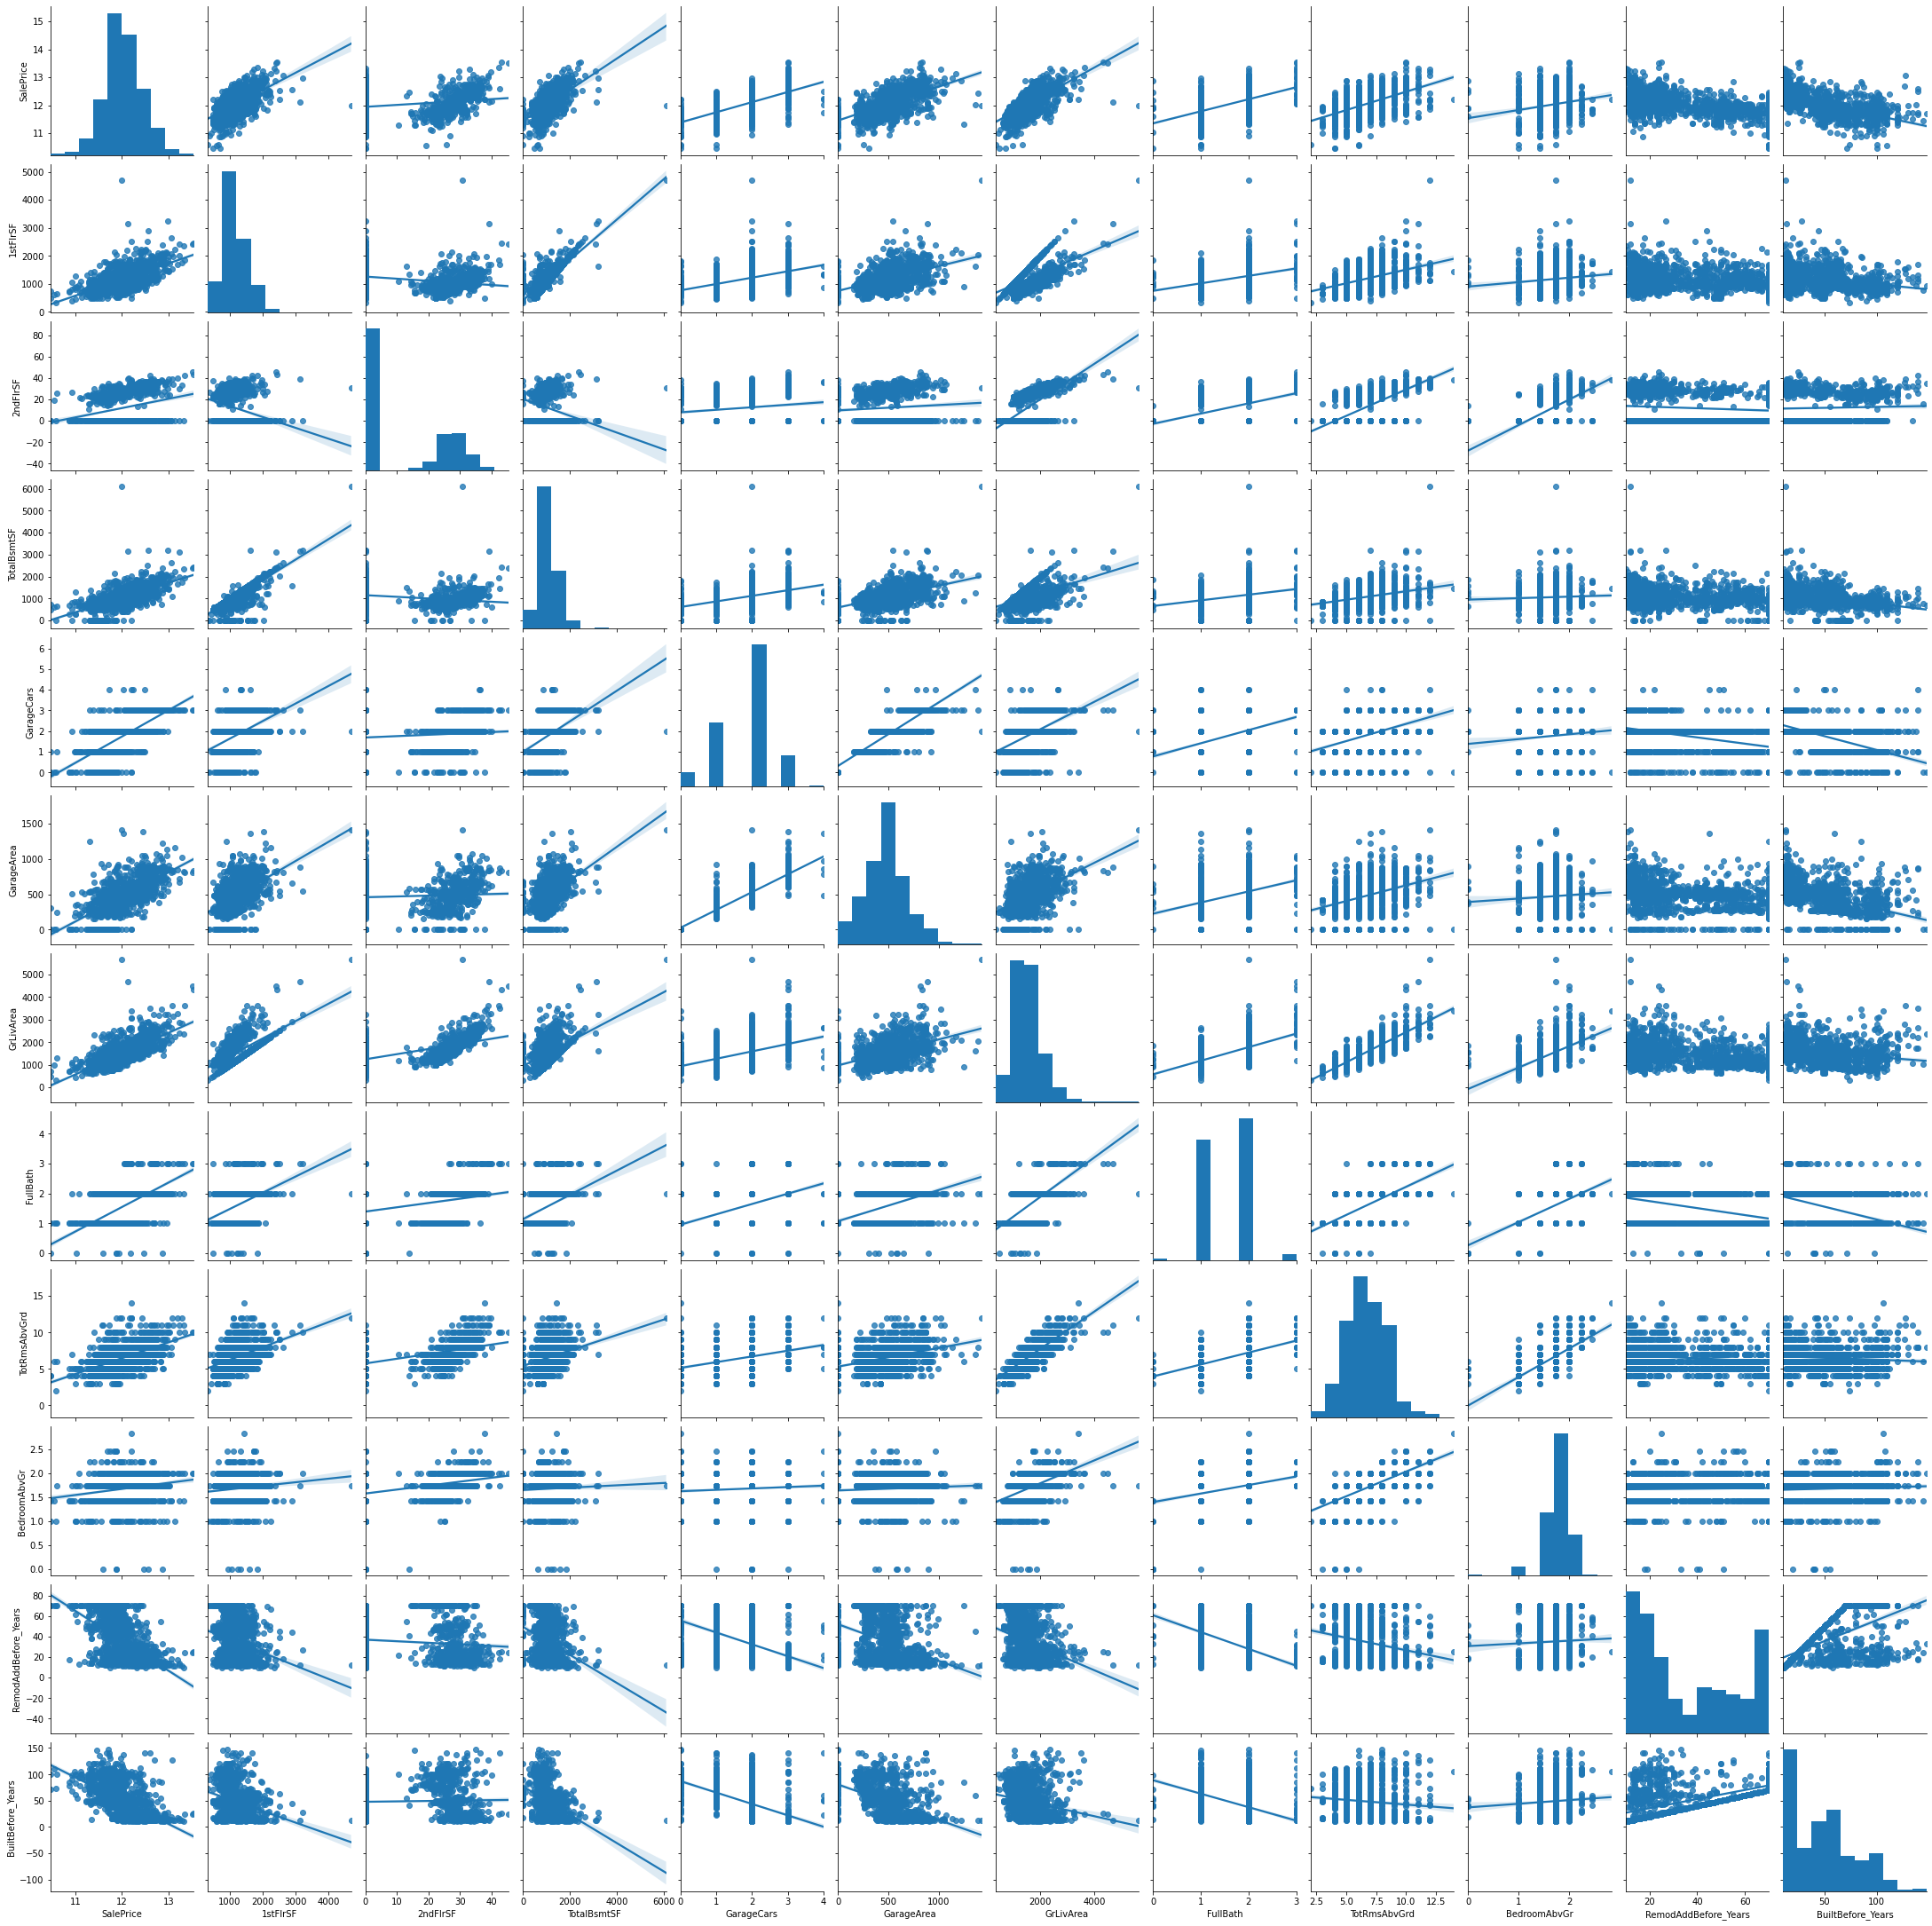

In [41]:
high_corr = ['SalePrice', '1stFlrSF', '2ndFlrSF','TotalBsmtSF', 'GarageCars', 'GarageArea', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd','BedroomAbvGr','RemodAddBefore_Years','BuiltBefore_Years']

sns.pairplot(housesale_df[high_corr],kind='reg')
plt.show()

### Outlier Treatment

- Mostly all the numeric columns have outliers. 
- with central limit theorem - 99% of data is with 3*SD of the mean

In [42]:
# Removing outliers > +3 Std. Deviation or < -3 Std. Deviation 
# Checking if outliers exist
from scipy import stats
val = np.abs(stats.zscore(housesale_df[numeric_cols]))
# Outlier Removed Records
selected = housesale_df[numeric_cols][(val < 3).all(axis=1)]
housesale_df = housesale_df.loc[selected.index]
housesale_df.shape

(1038, 74)

### Get the dummies for the categorical varaiables
- Ordinal value columns are mapped according to their level

In [43]:
#housesale_df['LandSlope'] = housesale_df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
housesale_df['ExterQual'] = housesale_df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housesale_df['BsmtQual'] = housesale_df.BsmtQual.map({'No Basement':-1,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housesale_df['BsmtCond'] = housesale_df.BsmtCond.map({'No Basement':-1,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housesale_df['BsmtExposure'] = housesale_df.BsmtExposure.map({'No Basement':-1,'No':1,'Mn':2,'Av':3,'Gd':4})
#housesale_df['BsmtFinType1'] = housesale_df.BsmtFinType1.map({'No Basement':-1,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
#housesale_df['BsmtFinType2'] = housesale_df.BsmtFinType2.map({'No Basement':-1,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housesale_df['HeatingQC'] = housesale_df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housesale_df['CentralAir'] = housesale_df.CentralAir.map({'N':0,'Y':1})
housesale_df['KitchenQual'] = housesale_df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
#housesale_df['GarageFinish'] = housesale_df.GarageFinish.map({'No garage':0,'Unf':1,'RFn':2,'Fin':3})
housesale_df['GarageQual'] = housesale_df.GarageQual.map({'No Garage':-1,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housesale_df['GarageCond'] = housesale_df.GarageCond.map({'No Garage':-1,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housesale_df['ExterCond'] = housesale_df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
#housesale_df['LotShape'] = housesale_df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [44]:
# Retrieve dummies for all columns using a loop
for col in nom_cat_col:
    # Let's drop the first column from dummy df using 'drop_first = True' otherwise it will get multicollinear
    dummies = pd.get_dummies(housesale_df[col], drop_first = True)
    # Adding prefix to dummy column names so as to identify it later
    dummies = dummies.add_prefix(f'{col}_')
    # Add the results to the original housing dataframe
    housesale_df = pd.concat([housesale_df, dummies], axis = 1)
    # Drop original categorical column as we have created the dummies for it
    housesale_df.drop([col], axis = 1, inplace = True)

housesale_df.head()

LotArea OverallQual OverallCond  MasVnrArea  ExterQual  ExterCond  \
0    91.923882           7           5       196.0          3          2   
2   106.066017           7           5       162.0          3          2   
4   119.415242           8           5       350.0          3          2   
6   100.419122           8           5       186.0          3          2   
10  105.830052           5           5         0.0          2          2   

    BsmtQual  BsmtCond  BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          4         3             1         706         0.0  12.247449   
2          4         3             2         486         0.0  20.832667   
4          4         3             3         655         0.0  22.135944   
6          5         3             3        1369         0.0  17.804494   
10         3         3             1         906         0.0  11.575837   

    TotalBsmtSF  HeatingQC  CentralAir  1stFlrSF   2ndFlrSF  LowQualFinSF  \
0           856          4           1       856  29.223278           0.0   
2           920          4           1       920  29.427878           0.0   
4          1145          4           1      1145  32.449961           0.0   
6          1686          4           1      1694   0.000000           0.0   
10         1040          4           1      1040   0.000000           0.0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        1710           1.0             0         2       1.0      1.732051   
2        1786           1.0             0         2       1.0      1.732051   
4        2198           1.0             0         2       1.0      2.000000   
6        1694           1.0             0         2       0.0      1.732051   
10       1040           1.0             0         1       0.0      1.732051   

    KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  GarageCars  \
0            1.0            3             8           0           2   
2            1.0            3             6           1           2   
4            1.0            3             9           1           3   
6            1.0            3             7           1           2   
10           1.0            2             5           0           1   

    GarageArea  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  \
0          548           3           3    0.000000     7.810250   
2          608           3           3    0.000000     6.480741   
4          836           3           3   13.856406     9.165151   
6          636           3           3   15.968719     7.549834   
10         384           3           3    0.000000     0.000000   

    EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice  \
0             0.0        0.0          0.0       0.0      0.0  12.247694   
2             0.0        0.0          0.0       0.0      0.0  12.317167   
4             0.0        0.0          0.0       0.0      0.0  12.429216   
6             0.0        0.0          0.0       0.0      0.0  12.634603   
10            0.0        0.0          0.0       0.0      0.0  11.771436   

    BuiltBefore_Years  RemodAddBefore_Years  GarageYrBltBefore_Years  \
0                  17                    17                       17   
2                  19                    18                       19   
4                  20                    20                       20   
6                  16                    15                       16   
10                 55                    55                       55   

    MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0               0              0              0              0              1   
2               0              0              0              0              1   
4               0              0              0              0              1   
6               0              0              0              0              0   
10              0              0          

In [45]:
housesale_df.shape

(1038, 222)

### Split Data into Train and Test Sets

In [46]:
df_train, df_test = train_test_split(housesale_df, train_size = 0.7, test_size = 0.3, random_state = 100)
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

In [47]:
#Scale the dataset
scaler = StandardScaler()
Colsto_scale=['LotArea','MasVnrArea','BsmtFinSF1',
              'BsmtFinSF2','TotalBsmtSF','1stFlrSF','2ndFlrSF',
              'LowQualFinSF','GrLivArea','OpenPorchSF',
             'EnclosedPorch','3SsnPorch','ScreenPorch' ,
              'PoolArea','MiscVal','WoodDeckSF','OpenPorchSF']
X_train[Colsto_scale] = scaler.fit_transform(X_train[Colsto_scale])
X_test[Colsto_scale] = scaler.transform(X_test[Colsto_scale])

In [48]:
X_train[Colsto_scale].describe()

LotArea    MasVnrArea    BsmtFinSF1    BsmtFinSF2   TotalBsmtSF  \
count  7.260000e+02  7.260000e+02  7.260000e+02  7.260000e+02  7.260000e+02   
mean   2.643279e-16  1.070463e-18  9.634167e-17 -2.312200e-16  2.886427e-16   
std    1.000689e+00  1.000689e+00  1.000689e+00  1.000689e+00  1.000689e+00   
min   -3.034961e+00 -6.568705e-01 -1.008341e+00 -2.509818e-01 -2.832991e+00   
25%   -4.585404e-01 -6.568705e-01 -1.008341e+00 -2.509818e-01 -6.559310e-01   
50%    7.334160e-02 -6.568705e-01 -7.788513e-02 -2.509818e-01 -1.553164e-01   
75%    5.870620e-01  4.565199e-01  6.847740e-01 -2.509818e-01  6.324355e-01   
max    3.819134e+00  4.101526e+00  2.980021e+00  5.709653e+00  3.054346e+00   

           1stFlrSF      2ndFlrSF  LowQualFinSF     GrLivArea   OpenPorchSF  \
count  7.260000e+02  7.260000e+02         726.0  7.260000e+02  7.260000e+02   
mean  -2.439126e-16 -2.682274e-16           0.0 -5.933423e-17  1.682156e-16   
std    1.000689e+00  1.000689e+00           0.0  1.000689e+00  1.000689e+00   
min   -2.036087e+00 -8.331977e-01           0.0 -2.365634e+00 -1.021677e+00   
25%   -7.674537e-01 -8.331977e-01           0.0 -7.637066e-01 -1.021677e+00   
50%   -1.703621e-01 -8.331977e-01           0.0 -3.319920e-02  1.311650e-01   
75%    6.456136e-01  1.106171e+00           0.0  6.318632e-01  7.027561e-01   
max    3.199260e+00  1.854781e+00           0.0  3.374656e+00  2.727636e+00   

       EnclosedPorch     3SsnPorch   ScreenPorch  PoolArea       MiscVal  \
count   7.260000e+02  7.260000e+02  7.260000e+02     726.0  7.260000e+02   
mean   -3.318435e-17  2.724137e-16  2.279322e-16       0.0 -3.018706e-16   
std     1.000689e+00  1.000689e+00  1.000689e+00       0.0  1.000689e+00   
min    -3.639652e-01 -3.713907e-02 -1.669434e-01       0.0 -9.128709e-02   
25%    -3.639652e-01 -3.713907e-02 -1.669434e-01       0.0 -9.128709e-02   
50%    -3.639652e-01 -3.713907e-02 -1.669434e-01       0.0 -9.128709e-02   
75%    -3.639652e-01 -3.713907e-02 -1.669434e-01       0.0 -9.128709e-02   
max     3.680432e+00  2.692582e+01  6.656576e+00       0.0  1.095445e+01   

         WoodDeckSF   OpenPorchSF  
count  7.260000e+02  7.260000e+02  
mean  -6.535559e-17  1.682156e-16  
std    1.000689e+00  1.000689e+00  
min   -9.192047e-01 -1.021677e+00  
25%   -9.192047e-01 -1.021677e+00  
50%   -9.192047e-01  1.311650e-01  
75%    8.935995e-01  7.027561e-01  
max    2.875126e+00  2.727636e+00

In [49]:
X_test[Colsto_scale].describe()

LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  \
count  312.000000  312.000000  312.000000  312.000000   312.000000   
mean     0.132119   -0.017509    0.096218    0.010774    -0.075098   
std      1.212784    1.025824    1.019158    1.053417     1.038653   
min     -2.909896   -0.656871   -1.008341   -0.250982    -2.832991   
25%     -0.465046   -0.656871   -1.008341   -0.250982    -0.683212   
50%      0.173055   -0.656871    0.096575   -0.250982    -0.258986   
75%      0.765650    0.538305    0.802293   -0.250982     0.484434   
max      4.448531    4.027176    2.914598    5.689344     2.953405   

         1stFlrSF    2ndFlrSF  LowQualFinSF   GrLivArea  OpenPorchSF  \
count  312.000000  312.000000    312.000000  312.000000   312.000000   
mean    -0.060529    0.072436      0.023334    0.040296     0.056274   
std      1.025589    1.036848      0.412155    1.137275     1.046438   
min     -1.902077   -0.833198      0.000000   -1.912826    -1.021677   
25%     -0.785322   -0.833198      0.000000   -0.866886    -1.021677   
50%     -0.244812   -0.833198      0.000000   -0.098055     0.121394   
75%      0.544361    1.122851      0.000000    0.689054     0.794994   
max      3.232018    1.918174      7.280110    3.624644     3.028044   

       EnclosedPorch     3SsnPorch  ScreenPorch  PoolArea     MiscVal  \
count     312.000000  3.120000e+02   312.000000     312.0  312.000000   
mean        0.040111 -3.713907e-02     0.013767       0.0    0.027930   
std         1.082374  2.571515e-16     1.010106       0.0    1.102557   
min        -0.363965 -3.713907e-02    -0.166943       0.0   -0.091287   
25%        -0.363965 -3.713907e-02    -0.166943       0.0   -0.091287   
50%        -0.363965 -3.713907e-02    -0.166943       0.0   -0.091287   
75%        -0.363965 -3.713907e-02    -0.166943       0.0   -0.091287   
max         3.699112 -3.713907e-02     6.539526       0.0   10.954451   

       WoodDeckSF  OpenPorchSF  
count  312.000000   312.000000  
mean     0.015023     0.056274  
std      0.979703     1.046438  
min     -0.919205    -1.021677  
25%     -0.919205    -1.021677  
50%     -0.116597     0.121394  
75%      0.893600     0.794994  
max      2.854448     3.028044

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((726, 221), (312, 221), (726,), (312,))

### Performing Simple Linear Regression

In [51]:
# linear regression with all predictors
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict train
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
# predict test
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9580457166682159
0.886105106942747


In [52]:
# Simple Linear Regression model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = housesale_df.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(10.844, 'constant'),
 (0.647, 'Heating_Grav'),
 (0.395, 'Heating_GasA'),
 (-0.366, 'Electrical_SBrkr'),
 (0.361, 'Electrical_FuseP'),
 (-0.328, 'HouseStyle_2Story'),
 (-0.285, 'Functional_Min2'),
 (0.276, 'Heating_GasW'),
 (-0.268, 'RoofMatl_WdShngl'),
 (0.261, 'Foundation_Wood'),
 (0.245, 'SaleCondition_Normal'),
 (-0.225, 'MSSubClass_120'),
 (0.221, 'SaleType_WD'),
 (-0.22, 'MSSubClass_45'),
 (0.199, 'YrSold_2010'),
 (0.181, 'Exterior2nd_CBlock'),
 (-0.179, 'HouseStyle_1.5Unf'),
 (-0.174, 'Exterior2nd_MetalSd'),
 (-0.172, 'Neighborhood_IDOTRR'),
 (0.17, 'GarageType_Detchd'),
 (0.17, 'GarageType_No Garage'),
 (0.168, 'Exterior1st_ImStucc'),
 (0.156, 'Condition1_RRNe'),
 (-0.156, 'Electrical_FuseF'),
 (-0.154, 'SaleType_ConLw'),
 (0.152, 'Exterior1st_Stucco'),
 (-0.152, 'Foundation_Stone'),
 (-0.149, 'HouseStyle_SFoyer'),
 (-0.146, 'SaleType_ConLI'),
 (-0.136, 'Neighborhood_OldTown'),
 (-0.136, 'Condition2_RRNn'),
 (0.135, 'SaleType_Con'),
 (0.133, 'MSSubClass_190'),
 (0.132, 'Condit

#### Summary:

- Simple Linear Regression gave us a complex model with most of the coefficients as non-zero values.
- Simple Linear Regression has not helped us in the feature selection.
- Even though Simple linear regression gave us good r2-Score but it is complex which may lead to overfitting

### Recursive Feature Elimination

In [53]:
n_features_list = list(range(20, 60)) #checking for optimal number of features between 20 to 60
train_adjusted_r2 = []
train_r2 = []
test_r2 = []
train_RMSE=[]
test_RMSE=[]

for n_features in range(20, 60):

    # RFE with n features
    lm = LinearRegression()

    # specifying number of features
    rfe_n = RFE(estimator=lm, n_features_to_select=n_features)

    # fit with n features
    rfe_n.fit(X_train, y_train)

    # selecting features selected by rfe_n
    col_n = X_train.columns[rfe_n.support_] #rfe_n.support_: returns an array with boolean values to indicate whether 
    #an attribute was selected using RFE

    # training & test data for n selected columns
    X_train_rfe_n = X_train[col_n]
    X_test_rfe_n = X_test[col_n]


    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)


    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')

    
    
    # fitting the model with n featues
    lm_sm = sm.OLS(y_train, X_train_rfe_n).fit()
    
    
    # # Making predictions
    y_pred_test = lm_sm.predict(X_test_rfe_n)
    y_pred_train = lm_sm.predict(X_train_rfe_n)
    
    
    #Calculating evaluation metrics
    
    #R-square
    train_adjusted_r2.append(lm_sm.rsquared_adj)
    train_r2.append(lm_sm.rsquared)
    test_r2.append(r2_score(y_test, y_pred_test))
    
    #RMSE/stan. error
    error_test=y_pred_test-y_test
    error_train=y_pred_train-y_train
    
    test_RMSE.append(((error_test**2).mean())**0.5)
    train_RMSE.append(((error_train**2).mean())**0.5)

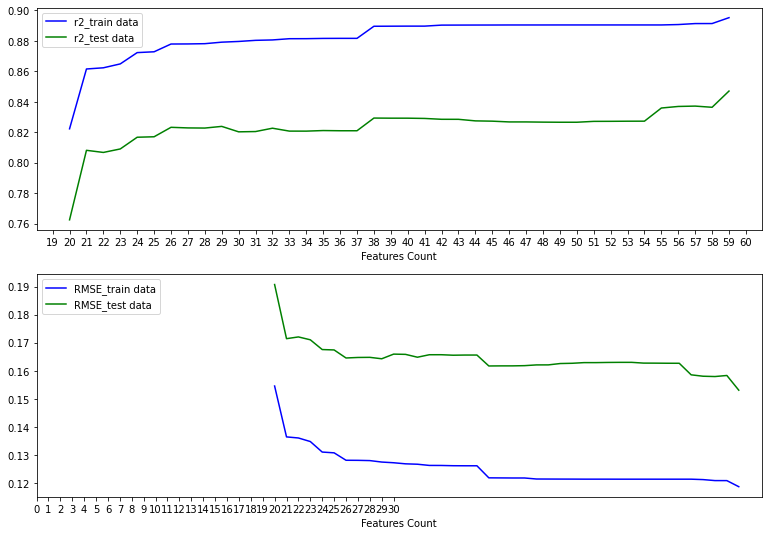

In [54]:
# plotting r2 and RMSE against n_features
#reference from web and modified accordingly
import matplotlib.ticker as plticker

fig,ax=plt.subplots(2,1,figsize=(13, 9))
ax[0].plot(n_features_list, train_r2,'b', label="r2_train data")
ax[0].plot(n_features_list, test_r2,'g', label="r2_test data")
ax[0].set_xlabel('Features Count')
 #method 1 of ticks
ax[0].legend(loc='upper left')
loc = plticker.MultipleLocator(base=1)
ax[0].xaxis.set_major_locator(loc)

ax[1].plot(n_features_list, train_RMSE, 'b',label="RMSE_train data")
ax[1].plot(n_features_list, test_RMSE, 'g',label="RMSE_test data")
ax[1].set_xlabel('Features Count')

#method 2 of ticks
ax[1].legend(loc='upper left')
plt.xticks(np.arange(0, 31, step=1))

plt.show()


-  From the above graphs we find:

1. R sqaure for test data peaks start from 21-38 features and at this point model generalises well as train R2 and test seemd to be constantly parallel to each other. Train R2 keep on increasing beyond 21-38 features but R2 keeps increasing as you add more features to train data. We have select number of features where model accuracy and generalization both are at satisfactory level.
2. RMSE for test data is lowest at 21-38 features and beyond that it increases. Train RMSE at 21-38 also looks good, adding more features to train decreases RMSE but again there is always a trade off between removing features (aka reducing complexity) and model performance.
3. Till 38 features metrics seems to be promising and complexity can be handled by regularisation. So choosing 38 features.

In [55]:
lm_model  = LinearRegression()
lm_model.fit(X_train,y_train)
rfe = RFE(lm,38)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=38)

In [56]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [57]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotArea', False, 67),
 ('OverallQual', False, 25),
 ('OverallCond', False, 48),
 ('MasVnrArea', False, 158),
 ('ExterQual', False, 142),
 ('ExterCond', False, 113),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 144),
 ('BsmtExposure', False, 109),
 ('BsmtFinSF1', False, 81),
 ('BsmtFinSF2', False, 164),
 ('BsmtUnfSF', False, 154),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 108),
 ('CentralAir', False, 132),
 ('1stFlrSF', False, 123),
 ('2ndFlrSF', False, 141),
 ('LowQualFinSF', False, 181),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 178),
 ('FullBath', False, 43),
 ('HalfBath', False, 42),
 ('BedroomAbvGr', False, 133),
 ('KitchenAbvGr', False, 179),
 ('KitchenQual', False, 58),
 ('TotRmsAbvGrd', False, 173),
 ('Fireplaces', False, 85),
 ('GarageCars', False, 30),
 ('GarageArea', False, 175),
 ('GarageQual', False, 103),
 ('GarageCond', True, 1),
 ('WoodDeckSF', False, 100),
 ('OpenPorchSF', False, 115),
 ('EnclosedPorch', False, 131),
 ('3Ssn

In [58]:
rfe_sel_columns = X_train.columns[rfe.support_]

In [59]:
rfe_sel_columns.tolist()

['BsmtQual',
 'TotalBsmtSF',
 'GrLivArea',
 'BsmtFullBath',
 'GarageCond',
 'MSSubClass_30',
 'MSSubClass_90',
 'MSZoning_FV',
 'MSZoning_RL',
 'Neighborhood_Edwards',
 'Neighborhood_SWISU',
 'Condition1_RRNe',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'HouseStyle_1.5Unf',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_VinylSd',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_CmentBd',
 'Exterior2nd_Other',
 'Exterior2nd_Stucco',
 'Exterior2nd_Wd Sdng',
 'Exterior2nd_Wd Shng',
 'Heating_Wall',
 'Functional_Maj2',
 'Functional_Mod',
 'BsmtFinType1_No Basement',
 'BsmtFinType2_No Basement',
 'GarageType_CarPort',
 'SaleType_CWD',
 'SaleType_Con',
 'SaleType_ConLI',
 'SaleCondition_Partial']

In [60]:
X_train.columns[~rfe.support_]

Index(['LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'YrSold_2010', 'SaleType_ConLD', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal'],
      dtype='object', length=183)

In [61]:
X_train_rfe = X_train[rfe_sel_columns]
X_test_rfe = X_test[rfe_sel_columns]

In [62]:
y_train_pred = lm_model.predict(X_train)
y_test_pred = lm_model.predict(X_test)

In [63]:
from sklearn import metrics
print('TRAIN DATA')
print('R-Squared:', metrics.r2_score(y_train,y_train_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train,y_train_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train,y_train_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))

print('TEST DATA')
print('R-Squared:', metrics.r2_score(y_test,y_test_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

TRAIN DATA
R-Squared: 0.9580457166682159
Mean Absolute Error: 0.05193856178717521
Mean Squared Error: 0.005638601136966612
Root Mean Squared Error: 0.07509061950048496
TEST DATA
R-Squared: 0.886105106942747
Mean Absolute Error: 0.09193744828567567
Mean Squared Error: 0.017448536184869103
Root Mean Squared Error: 0.13209290739804733


#### Lets filter the train and test set for the RFE selected columns

In [64]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

### Ridge Regression

In [65]:
# list of alphas to tune
params = {'alpha': [0.0001,0.0005, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

ridge = Ridge()

# cross validation
#folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    1.0s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [66]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.005400      0.000490         0.002801    4.008677e-04      0.0001   
1       0.003801      0.000401         0.002199    4.008385e-04      0.0005   
2       0.003400      0.000490         0.002000    2.861023e-07       0.001   
3       0.003602      0.000803         0.001998    3.183044e-06        0.01   
4       0.004400      0.000489         0.002200    4.002095e-04        0.05   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.098671          -0.090543          -0.106843   
1  {'alpha': 0.0005}          -0.098672          -0.090543          -0.106837   
2   {'alpha': 0.001}          -0.098674          -0.090544          -0.106829   
3    {'alpha': 0.01}          -0.098703          -0.090552          -0.106694   
4    {'alpha': 0.05}          -0.098824          -0.090594          -0.106135   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.097138          -0.100171        -0.098673        0.005243   
1          -0.097139          -0.100167        -0.098672        0.005241   
2          -0.097140          -0.100162        -0.098670        0.005238   
3          -0.097155          -0.100072        -0.098635        0.005187   
4          -0.097222          -0.099689        -0.098493        0.004979   

   rank_test_score  split0_train_score  split1_train_score  \
0               16           -0.089607           -0.091413   
1               15           -0.089608           -0.091413   
2               14           -0.089608           -0.091414   
3               13           -0.089622           -0.091431   
4               12           -0.089688           -0.091500   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.088093           -0.090400           -0.090102   
1           -0.088094           -0.090401           -0.090103   
2           -0.088095           -0.090402           -0.090105   
3           -0.088113           -0.090421           -0.090134   
4           -0.088191           -0.090503           -0.090261   

   mean_train_score  std_train_score  
0         -0.089923         0.001089  
1         -0.089924         0.001089  
2         -0.089925         0.001089  
3         -0.089944         0.001089  
4         -0.090029         0.001090

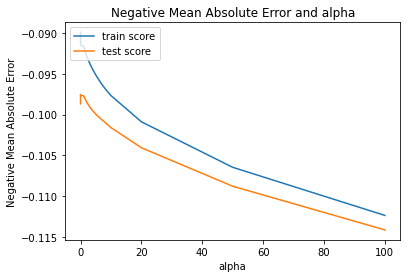

In [67]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [68]:
model_cv.best_score_

-0.09755633203172576

In [69]:
model_cv.best_params_.get('alpha')

0.6

In [70]:
alpha = model_cv.best_params_.get('alpha')

ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=0.6)

In [71]:
# predict
y_train_pred = ridge.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8887706215164284
0.8326433043403103


In [72]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']

In [73]:
ridge_coef.sort_values(by='Coef',ascending=False).head()

Feature       Coef
0                   BsmtQual  11.277905
32  BsmtFinType2_No Basement   0.244128
33        GarageType_CarPort   0.244128
37     SaleCondition_Partial   0.186258
35              SaleType_Con   0.174380

### Lasso Regression

In [74]:
lasso = Lasso()

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# cross validation
mlasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

mlasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    1.0s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [75]:
cv_results = pd.DataFrame(mlasso_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0         0.0058      0.000748           0.0030    6.324851e-04      0.0001   
1         0.0042      0.000400           0.0022    3.999712e-04      0.0005   
2         0.0034      0.000490           0.0018    3.998041e-04       0.001   
3         0.0040      0.000633           0.0020    3.873843e-07        0.01   
4         0.0040      0.000633           0.0026    4.896099e-04        0.05   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.099500          -0.091407          -0.104436   
1  {'alpha': 0.0005}          -0.101356          -0.094253          -0.102069   
2   {'alpha': 0.001}          -0.101800          -0.095099          -0.100811   
3    {'alpha': 0.01}          -0.124859          -0.105342          -0.120644   
4    {'alpha': 0.05}          -0.143977          -0.127385          -0.143611   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.098653          -0.098139        -0.098427        0.004163   
1          -0.099953          -0.098837        -0.099294        0.002757   
2          -0.100808          -0.101374        -0.099978        0.002468   
3          -0.124834          -0.119574        -0.119051        0.007182   
4          -0.146944          -0.149428        -0.142269        0.007738   

   rank_test_score  split0_train_score  split1_train_score  \
0                1           -0.090273           -0.092040   
1                2           -0.093260           -0.094210   
2                3           -0.094984           -0.096402   
3                4           -0.115493           -0.119826   
4                5           -0.140163           -0.143853   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.088916           -0.091207           -0.091211   
1           -0.092549           -0.093614           -0.094698   
2           -0.095421           -0.096271           -0.096647   
3           -0.116505           -0.115904           -0.117314   
4           -0.138993           -0.138054           -0.142739   

   mean_train_score  std_train_score  
0         -0.090729         0.001065  
1         -0.093666         0.000745  
2         -0.095945         0.000633  
3         -0.117009         0.001536  
4         -0.140760         0.002204

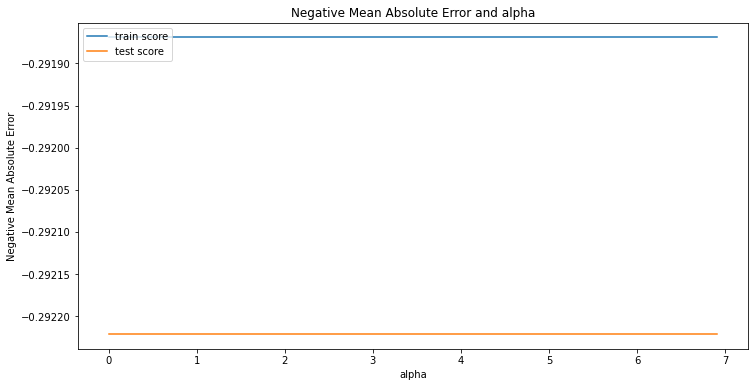

In [76]:
# plotting mean test and train scoes with alpha 
plt.figure(figsize=(12,6))

cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(np.log(cv_results['param_alpha']), cv_results['mean_train_score'])
plt.plot(np.log(cv_results['param_alpha']), cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [77]:
mlasso_cv.best_score_

-0.09842686022727618

In [78]:
mlasso_cv.best_params_.get('alpha')

0.0001

In [79]:
alpha =mlasso_cv.best_params_.get('alpha')

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [80]:
# predict
y_train_pred = lasso.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8889091553989622
0.831585513308801


In [81]:
model_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feature','Coef']

In [82]:
lasso_coef[lasso_coef['Coef']==0]['Feature'].tolist()

['BldgType_Duplex', 'Exterior2nd_CmentBd', 'GarageType_CarPort']

In [83]:
lasso_cols = lasso_coef[~(lasso_coef['Coef']==0)]['Feature'].tolist()

In [91]:
lasso_cols

['BsmtQual',
 'TotalBsmtSF',
 'GrLivArea',
 'BsmtFullBath',
 'GarageCond',
 'MSSubClass_30',
 'MSSubClass_90',
 'MSZoning_FV',
 'MSZoning_RL',
 'Neighborhood_Edwards',
 'Neighborhood_SWISU',
 'Condition1_RRNe',
 'BldgType_Twnhs',
 'HouseStyle_1.5Unf',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_VinylSd',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_Other',
 'Exterior2nd_Stucco',
 'Exterior2nd_Wd Sdng',
 'Exterior2nd_Wd Shng',
 'Heating_Wall',
 'Functional_Maj2',
 'Functional_Mod',
 'BsmtFinType1_No Basement',
 'BsmtFinType2_No Basement',
 'SaleType_CWD',
 'SaleType_Con',
 'SaleType_ConLI',
 'SaleCondition_Partial']

In [93]:
lasso_coef[~(lasso_coef['Coef']==0)].sort_values(by='Coef',ascending=False).head(35)

Feature       Coef
0                   BsmtQual  11.282917
32  BsmtFinType2_No Basement   0.500779
37     SaleCondition_Partial   0.206602
29           Functional_Maj2   0.194393
35              SaleType_Con   0.188214
3               BsmtFullBath   0.173161
8                MSZoning_RL   0.166788
19       Exterior1st_MetalSd   0.130284
26       Exterior2nd_Wd Sdng   0.128165
1                TotalBsmtSF   0.120315
22       Exterior2nd_Brk Cmn   0.100428
17       Exterior1st_HdBoard   0.099084
9       Neighborhood_Edwards   0.098940
2                  GrLivArea   0.081462
4                 GarageCond   0.074321
36            SaleType_ConLI   0.063915
20       Exterior1st_Plywood   0.054756
28              Heating_Wall   0.053670
15       Exterior1st_BrkComm   0.050171
5              MSSubClass_30   0.043642
27       Exterior2nd_Wd Shng   0.043497
13            BldgType_Twnhs   0.042782
7                MSZoning_FV   0.041095
24         Exterior2nd_Other   0.040912
18       Exterior1st_ImStucc   0.032844
25        Exterior2nd_Stucco   0.026201
21       Exterior1st_VinylSd   0.021930
14         HouseStyle_1.5Unf  -0.080539
6              MSSubClass_90  -0.086746
34              SaleType_CWD  -0.089821
10        Neighborhood_SWISU  -0.107634
16       Exterior1st_BrkFace  -0.125927
11           Condition1_RRNe  -0.186841
30            Functional_Mod  -0.288265
31  BsmtFinType1_No Basement  -0.418684

In [94]:
lasso_coef.head()

Feature       Coef
0      BsmtQual  11.282917
1   TotalBsmtSF   0.120315
2     GrLivArea   0.081462
3  BsmtFullBath   0.173161
4    GarageCond   0.074321

In [98]:
X_test.shape

(312, 38)

In [95]:
X_train_lasso = X_train[lasso_cols]
X_test_lasso = X_test[lasso_cols]

In [132]:
lasso = Lasso()

params = {'alpha': [0.0001,0.0002,0.00025,0.00028,0.0003,0.0004,0.0005, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# set up cross validation scheme
folds = 5

# cross validation
mlasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

mlasso_cv.fit(X_train_lasso, y_train)

Fitting 5 folds for each of 34 candidates, totalling 170 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    2.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.00025, 0.00028, 0.0003,
                                   0.0004, 0.0005, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [133]:
cv_results = pd.DataFrame(mlasso_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.009302      0.001664         0.000405        0.000811      0.0001   
1       0.004271      0.003619         0.003987        0.003577      0.0002   
2       0.008002      0.000003         0.006131        0.003109     0.00025   
3       0.008672      0.000886         0.000658        0.001315     0.00028   
4       0.006400      0.003200         0.004800        0.003919      0.0003   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.113739          -0.101968   
1   {'alpha': 0.0002}          -0.114835          -0.101287   
2  {'alpha': 0.00025}          -0.115321          -0.101330   
3  {'alpha': 0.00028}          -0.115568          -0.101355   
4   {'alpha': 0.0003}          -0.115689          -0.101375   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0          -0.083474          -0.095551          -0.098834        -0.098713   
1          -0.083954          -0.095098          -0.098345        -0.098704   
2          -0.084105          -0.094749          -0.098459        -0.098793   
3          -0.084185          -0.094511          -0.098639        -0.098852   
4          -0.084238          -0.094520          -0.098836        -0.098932   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.009784                2           -0.087437           -0.090932   
1        0.009976                1           -0.088058           -0.091569   
2        0.010117                3           -0.088332           -0.091861   
3        0.010195                4           -0.088479           -0.092045   
4        0.010219                5           -0.088572           -0.092172   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.095571           -0.091629           -0.092275   
1           -0.096079           -0.092252           -0.092836   
2           -0.096408           -0.092564           -0.093145   
3           -0.096612           -0.092776           -0.093290   
4           -0.096734           -0.092899           -0.093389   

   mean_train_score  std_train_score  
0         -0.091569         0.002608  
1         -0.092159         0.002569  
2         -0.092462         0.002587  
3         -0.092640         0.002603  
4         -0.092753         0.002611

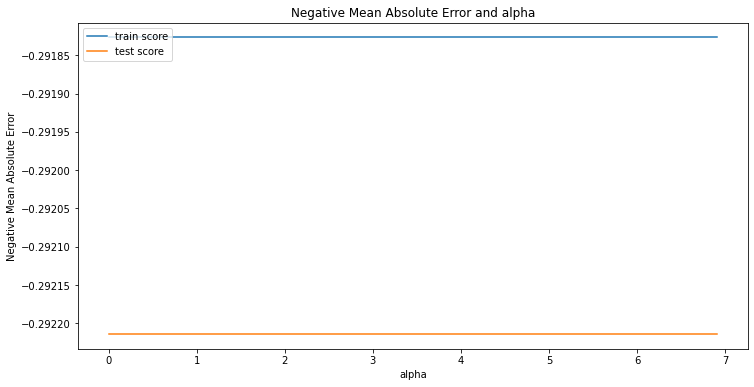

In [134]:
# plotting mean test and train scoes with alpha 
plt.figure(figsize=(12,6))

cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(np.log(cv_results['param_alpha']), cv_results['mean_train_score'])
plt.plot(np.log(cv_results['param_alpha']), cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [135]:
mlasso_cv.best_score_

-0.09870374604907

In [136]:
mlasso_cv.best_params_.get('alpha')

0.0002

In [137]:
alpha =mlasso_cv.best_params_.get('alpha')

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lasso, y_train)

Lasso(alpha=0.0002)

In [138]:
# predict
y_train_pred = lasso.predict(X_train_lasso)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test_lasso)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8869457664340253
0.8320024056846561


In [139]:
model_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
cols = X_train_lasso.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feature','Coef']

In [140]:
lasso_coef[lasso_coef['Coef']==0]['Feature'].tolist()

['BldgType_Twnhs',
 'Exterior1st_VinylSd',
 'Exterior2nd_Other',
 'Exterior2nd_Stucco',
 'SaleType_CWD',
 'SaleType_ConLI']

In [141]:
lasso_cols = lasso_coef[~(lasso_coef['Coef']==0)]['Feature'].tolist()

In [144]:
len(lasso_cols)

29

In [143]:
lasso_coef[~(lasso_coef['Coef']==0)].sort_values(by='Coef',ascending=False).head(35)

Feature       Coef
0                   BsmtQual  11.305247
30  BsmtFinType2_No Basement   0.499086
34     SaleCondition_Partial   0.179201
3               BsmtFullBath   0.173322
8                MSZoning_RL   0.169922
32              SaleType_Con   0.150598
1                TotalBsmtSF   0.120313
9       Neighborhood_Edwards   0.099432
24       Exterior2nd_Wd Sdng   0.097727
27           Functional_Maj2   0.088039
2                  GrLivArea   0.081756
4                 GarageCond   0.075366
21       Exterior2nd_Brk Cmn   0.074775
16       Exterior1st_HdBoard   0.074485
7                MSZoning_FV   0.064188
5              MSSubClass_30   0.044240
14       Exterior1st_BrkComm   0.040922
26              Heating_Wall   0.032115
18       Exterior1st_MetalSd   0.031488
19       Exterior1st_Plywood   0.027779
25       Exterior2nd_Wd Shng   0.019648
17       Exterior1st_ImStucc   0.007570
13         HouseStyle_1.5Unf  -0.072960
6              MSSubClass_90  -0.087444
10        Neighborhood_SWISU  -0.104258
15       Exterior1st_BrkFace  -0.130932
11           Condition1_RRNe  -0.179284
28            Functional_Mod  -0.246980
29  BsmtFinType1_No Basement  -0.388897

In [145]:
X_train_lasso = X_train[lasso_cols]
X_test_lasso = X_test[lasso_cols]

In [146]:
lasso = Lasso()

params = {'alpha': [0.0001,0.0002,0.00025,0.00028,0.0003,0.0004,0.0005, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# set up cross validation scheme
folds = 5

# cross validation
mlasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

mlasso_cv.fit(X_train_lasso, y_train)

Fitting 5 folds for each of 34 candidates, totalling 170 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    2.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.00025, 0.00028, 0.0003,
                                   0.0004, 0.0005, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [147]:
cv_results = pd.DataFrame(mlasso_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.009946      0.002841         0.002907        0.002951      0.0001   
1       0.006439      0.003220         0.005031        0.004117      0.0002   
2       0.006408      0.003204         0.006393        0.003197     0.00025   
3       0.004404      0.004297         0.005499        0.004667     0.00028   
4       0.006404      0.003202         0.004855        0.003965      0.0003   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.116716          -0.103829   
1   {'alpha': 0.0002}          -0.117360          -0.103506   
2  {'alpha': 0.00025}          -0.117688          -0.103340   
3  {'alpha': 0.00028}          -0.117862          -0.103221   
4   {'alpha': 0.0003}          -0.117968          -0.103145   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0          -0.086117          -0.098348          -0.100127        -0.101028   
1          -0.086444          -0.098039          -0.099932        -0.101056   
2          -0.086607          -0.097891          -0.099874        -0.101080   
3          -0.086679          -0.097803          -0.100070        -0.101127   
4          -0.086737          -0.097756          -0.100188        -0.101159   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.009842                1           -0.089801           -0.093934   
1        0.009957                2           -0.090206           -0.094323   
2        0.010020                3           -0.090414           -0.094525   
3        0.010054                4           -0.090513           -0.094640   
4        0.010070                5           -0.090563           -0.094716   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.098561           -0.094494           -0.095433   
1           -0.098892           -0.094903           -0.095817   
2           -0.099088           -0.095084           -0.095963   
3           -0.099199           -0.095220           -0.096035   
4           -0.099258           -0.095314           -0.096074   

   mean_train_score  std_train_score  
0         -0.094444         0.002820  
1         -0.094828         0.002797  
2         -0.095015         0.002789  
3         -0.095121         0.002791  
4         -0.095185         0.002792

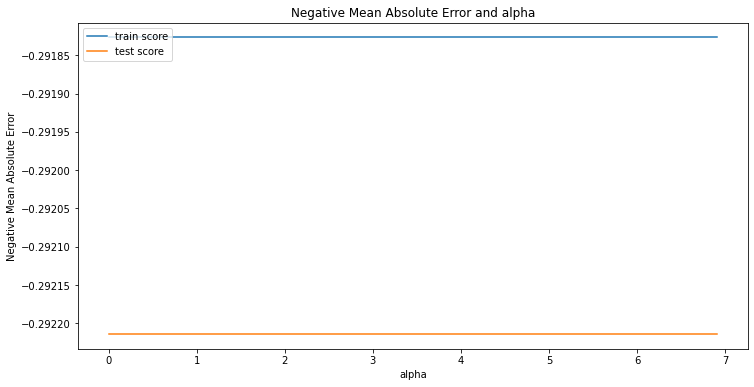

In [148]:
# plotting mean test and train scoes with alpha 
plt.figure(figsize=(12,6))

cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(np.log(cv_results['param_alpha']), cv_results['mean_train_score'])
plt.plot(np.log(cv_results['param_alpha']), cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [149]:
mlasso_cv.best_score_

-0.1010275249254757

In [150]:
mlasso_cv.best_params_.get('alpha')

0.0001

In [151]:
alpha =mlasso_cv.best_params_.get('alpha')

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lasso, y_train)

Lasso(alpha=0.0001)

In [152]:
# predict
y_train_pred = lasso.predict(X_train_lasso)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test_lasso)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8809974196292748
0.8357284620346486


In [153]:
model_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
cols = X_train_lasso.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feature','Coef']

In [154]:
lasso_coef[lasso_coef['Coef']==0]['Feature'].tolist()

['HouseStyle_1.5Unf', 'SaleType_Con']

In [155]:
lasso_cols = lasso_coef[~(lasso_coef['Coef']==0)]['Feature'].tolist()

In [156]:
len(lasso_cols)

27

In [157]:
lasso_coef[~(lasso_coef['Coef']==0)].sort_values(by='Coef',ascending=False).head(35)

Feature       Coef
0                   BsmtQual  11.320886
26  BsmtFinType2_No Basement   0.528621
23           Functional_Maj2   0.179859
8                MSZoning_RL   0.175303
3               BsmtFullBath   0.173597
1                TotalBsmtSF   0.126450
9       Neighborhood_Edwards   0.119021
28     SaleCondition_Partial   0.087587
7                MSZoning_FV   0.085447
2                  GrLivArea   0.083249
4                 GarageCond   0.073618
13       Exterior1st_BrkComm   0.057647
5              MSSubClass_30   0.045975
17       Exterior1st_MetalSd   0.038368
15       Exterior1st_HdBoard   0.033461
22              Heating_Wall  -0.011359
18       Exterior1st_Plywood  -0.026317
21       Exterior2nd_Wd Shng  -0.026393
20       Exterior2nd_Wd Sdng  -0.039359
16       Exterior1st_ImStucc  -0.050477
19       Exterior2nd_Brk Cmn  -0.061847
6              MSSubClass_90  -0.078282
10        Neighborhood_SWISU  -0.105760
14       Exterior1st_BrkFace  -0.168021
11           Condition1_RRNe  -0.181911
24            Functional_Mod  -0.266711
25  BsmtFinType1_No Basement  -0.422806

In [158]:
X_train_lasso = X_train[lasso_cols]
X_test_lasso = X_test[lasso_cols]

In [159]:
lasso = Lasso()

params = {'alpha': [0.0001,0.0002,0.00025,0.00028,0.0003,0.0004,0.0005, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# set up cross validation scheme
folds = 5

# cross validation
mlasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

mlasso_cv.fit(X_train_lasso, y_train)

Fitting 5 folds for each of 34 candidates, totalling 170 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    2.0s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.00025, 0.00028, 0.0003,
                                   0.0004, 0.0005, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [160]:
cv_results = pd.DataFrame(mlasso_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.006256      0.003141         0.003375        0.004143      0.0001   
1       0.006456      0.003230         0.001802        0.003124      0.0002   
2       0.006402      0.003201         0.001597        0.003195     0.00025   
3       0.006403      0.003201         0.003198        0.003917     0.00028   
4       0.003202      0.003921         0.004800        0.003920      0.0003   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.116689          -0.103992   
1   {'alpha': 0.0002}          -0.117346          -0.103575   
2  {'alpha': 0.00025}          -0.117682          -0.103366   
3  {'alpha': 0.00028}          -0.117874          -0.103249   
4   {'alpha': 0.0003}          -0.117982          -0.103174   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0          -0.086086          -0.097630          -0.099977        -0.100875   
1          -0.086434          -0.097464          -0.099756        -0.100915   
2          -0.086613          -0.097411          -0.099732        -0.100961   
3          -0.086694          -0.097380          -0.099918        -0.101023   
4          -0.086753          -0.097359          -0.100042        -0.101062   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.009898                1           -0.089892           -0.093892   
1        0.010000                2           -0.090227           -0.094274   
2        0.010053                3           -0.090402           -0.094473   
3        0.010087                4           -0.090497           -0.094592   
4        0.010102                5           -0.090550           -0.094672   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.098659           -0.094661           -0.095472   
1           -0.098926           -0.094990           -0.095797   
2           -0.099086           -0.095129           -0.095907   
3           -0.099180           -0.095242           -0.095967   
4           -0.099242           -0.095320           -0.096007   

   mean_train_score  std_train_score  
0         -0.094515         0.002824  
1         -0.094843         0.002801  
2         -0.094999         0.002791  
3         -0.095096         0.002788  
4         -0.095158         0.002789

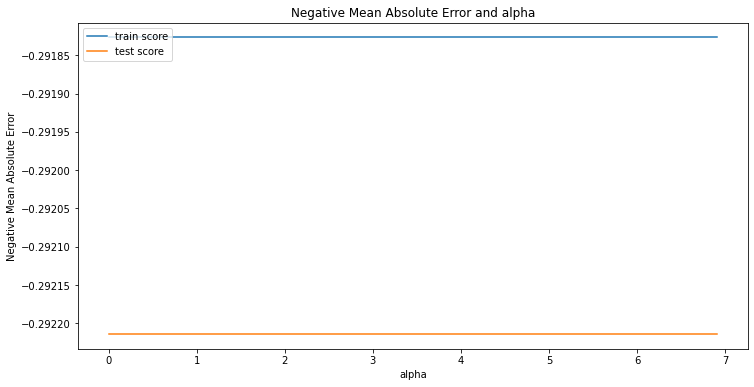

In [161]:
# plotting mean test and train scoes with alpha 
plt.figure(figsize=(12,6))

cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(np.log(cv_results['param_alpha']), cv_results['mean_train_score'])
plt.plot(np.log(cv_results['param_alpha']), cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [162]:
mlasso_cv.best_score_

-0.10087468098869443

In [163]:
mlasso_cv.best_params_.get('alpha')

0.0001

In [164]:
alpha =mlasso_cv.best_params_.get('alpha')

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lasso, y_train)

Lasso(alpha=0.0001)

In [165]:
# predict
y_train_pred = lasso.predict(X_train_lasso)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test_lasso)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8804937021796382
0.8335368447842096


In [166]:
model_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
cols = X_train_lasso.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feature','Coef']

In [167]:
lasso_coef[lasso_coef['Coef']==0]['Feature'].tolist()

['Exterior1st_BrkComm']

In [168]:
lasso_cols = lasso_coef[~(lasso_coef['Coef']==0)]['Feature'].tolist()

In [169]:
len(lasso_cols)

26

In [170]:
lasso_coef[~(lasso_coef['Coef']==0)].sort_values(by='Coef',ascending=False).head(35)

Feature          Coef
0                   BsmtQual  1.132404e+01
25  BsmtFinType2_No Basement  5.265468e-01
22           Functional_Maj2  1.860489e-01
8                MSZoning_RL  1.759324e-01
3               BsmtFullBath  1.728668e-01
1                TotalBsmtSF  1.263471e-01
9       Neighborhood_Edwards  1.173556e-01
7                MSZoning_FV  8.439389e-02
2                  GrLivArea  8.343091e-02
4                 GarageCond  7.264362e-02
5              MSSubClass_30  4.587279e-02
16       Exterior1st_MetalSd  3.859610e-02
14       Exterior1st_HdBoard  3.240573e-02
26     SaleCondition_Partial  4.099285e-17
21              Heating_Wall -1.188885e-02
20       Exterior2nd_Wd Shng -2.255863e-02
17       Exterior1st_Plywood -2.598606e-02
19       Exterior2nd_Wd Sdng -3.948726e-02
15       Exterior1st_ImStucc -5.110831e-02
18       Exterior2nd_Brk Cmn -6.241584e-02
6              MSSubClass_90 -8.224070e-02
10        Neighborhood_SWISU -1.070377e-01
13       Exterior1st_BrkFace -1.656162e-01
11           Condition1_RRNe -1.828437e-01
23            Functional_Mod -2.656999e-01
24  BsmtFinType1_No Basement -4.257349e-01

In [171]:
X_train_lasso = X_train[lasso_cols]
X_test_lasso = X_test[lasso_cols]

In [172]:
lasso = Lasso()

params = {'alpha': [0.0001,0.0002,0.00025,0.00028,0.0003,0.0004,0.0005, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# set up cross validation scheme
folds = 5

# cross validation
mlasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

mlasso_cv.fit(X_train_lasso, y_train)

Fitting 5 folds for each of 34 candidates, totalling 170 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    2.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.00025, 0.00028, 0.0003,
                                   0.0004, 0.0005, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [173]:
cv_results = pd.DataFrame(mlasso_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.006472      0.003239         0.001600        0.003200      0.0001   
1       0.006400      0.003200         0.005052        0.004151      0.0002   
2       0.009601      0.003199         0.003200        0.003919     0.00025   
3       0.006915      0.003574         0.004785        0.003907     0.00028   
4       0.009586      0.003208         0.003198        0.003916      0.0003   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.116246          -0.103036   
1   {'alpha': 0.0002}          -0.116949          -0.102710   
2  {'alpha': 0.00025}          -0.117308          -0.102566   
3  {'alpha': 0.00028}          -0.117527          -0.102480   
4   {'alpha': 0.0003}          -0.117673          -0.102423   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0          -0.085232          -0.097860          -0.099977        -0.100470   
1          -0.085546          -0.097681          -0.099756        -0.100528   
2          -0.085737          -0.097603          -0.099732        -0.100589   
3          -0.085862          -0.097556          -0.099918        -0.100668   
4          -0.085933          -0.097526          -0.100042        -0.100719   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.009947                1           -0.089885           -0.094253   
1        0.010075                2           -0.090205           -0.094572   
2        0.010136                3           -0.090374           -0.094746   
3        0.010168                4           -0.090475           -0.094851   
4        0.010194                5           -0.090547           -0.094921   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.098717           -0.094577           -0.095472   
1           -0.098971           -0.094925           -0.095797   
2           -0.099132           -0.095073           -0.095907   
3           -0.099253           -0.095191           -0.095967   
4           -0.099326           -0.095273           -0.096007   

   mean_train_score  std_train_score  
0         -0.094581         0.002830  
1         -0.094894         0.002812  
2         -0.095046         0.002806  
3         -0.095148         0.002809  
4         -0.095215         0.002808

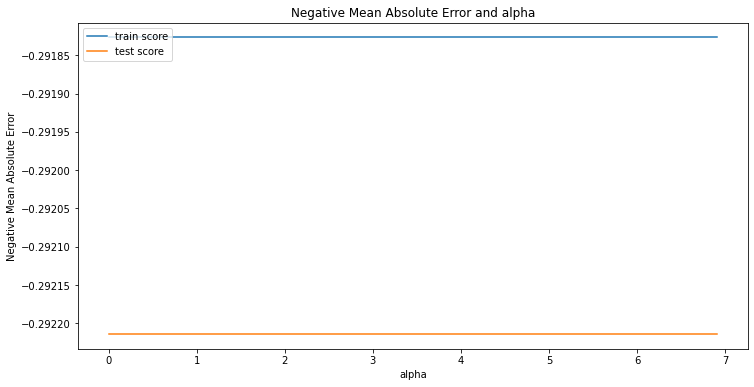

In [174]:
# plotting mean test and train scoes with alpha 
plt.figure(figsize=(12,6))

cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(np.log(cv_results['param_alpha']), cv_results['mean_train_score'])
plt.plot(np.log(cv_results['param_alpha']), cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [175]:
mlasso_cv.best_score_

-0.10047028764366248

In [176]:
mlasso_cv.best_params_.get('alpha')

0.0001

In [177]:
alpha =mlasso_cv.best_params_.get('alpha')

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lasso, y_train)

Lasso(alpha=0.0001)

In [178]:
# predict
y_train_pred = lasso.predict(X_train_lasso)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test_lasso)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8801336140072916
0.8321909357844123


In [179]:
model_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
cols = X_train_lasso.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feature','Coef']

In [180]:
lasso_coef[lasso_coef['Coef']==0]['Feature'].tolist()

['Exterior1st_BrkFace', 'SaleCondition_Partial']

In [181]:
lasso_cols = lasso_coef[~(lasso_coef['Coef']==0)]['Feature'].tolist()

In [182]:
len(lasso_cols)

24

In [183]:
lasso_coef[~(lasso_coef['Coef']==0)].sort_values(by='Coef',ascending=False).head(35)

Feature       Coef
0                   BsmtQual  11.321769
24  BsmtFinType2_No Basement   0.518783
21           Functional_Maj2   0.225022
8                MSZoning_RL   0.175181
3               BsmtFullBath   0.173159
1                TotalBsmtSF   0.126990
9       Neighborhood_Edwards   0.116963
7                MSZoning_FV   0.084423
2                  GrLivArea   0.083149
4                 GarageCond   0.072454
5              MSSubClass_30   0.045878
15       Exterior1st_MetalSd   0.039190
13       Exterior1st_HdBoard   0.034204
20              Heating_Wall  -0.011457
19       Exterior2nd_Wd Shng  -0.020483
16       Exterior1st_Plywood  -0.025008
14       Exterior1st_ImStucc  -0.050348
17       Exterior2nd_Brk Cmn  -0.057402
6              MSSubClass_90  -0.081950
18       Exterior2nd_Wd Sdng  -0.099848
10        Neighborhood_SWISU  -0.110236
11           Condition1_RRNe  -0.183373
22            Functional_Mod  -0.265572
23  BsmtFinType1_No Basement  -0.451744

In [184]:
X_train_lasso = X_train[lasso_cols]
X_test_lasso = X_test[lasso_cols]

In [185]:
lasso = Lasso()

params = {'alpha': [0.0001,0.0002,0.00025,0.00028,0.0003,0.0004,0.0005, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# set up cross validation scheme
folds = 5

# cross validation
mlasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

mlasso_cv.fit(X_train_lasso, y_train)

Fitting 5 folds for each of 34 candidates, totalling 170 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    1.9s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.00025, 0.00028, 0.0003,
                                   0.0004, 0.0005, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [186]:
cv_results = pd.DataFrame(mlasso_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.006975      0.002472         0.002623        0.003339      0.0001   
1       0.004800      0.003919         0.003199        0.003918      0.0002   
2       0.006401      0.003200         0.003448        0.004241     0.00025   
3       0.006400      0.003200         0.003201        0.003920     0.00028   
4       0.008759      0.001352         0.001601        0.003202      0.0003   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.116293          -0.106844   
1   {'alpha': 0.0002}          -0.116903          -0.106638   
2  {'alpha': 0.00025}          -0.117210          -0.106570   
3  {'alpha': 0.00028}          -0.117394          -0.106530   
4   {'alpha': 0.0003}          -0.117517          -0.106503   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0          -0.085892          -0.099747          -0.103586        -0.102472   
1          -0.086225          -0.099604          -0.103338        -0.102542   
2          -0.086399          -0.099530          -0.103239        -0.102590   
3          -0.086503          -0.099486          -0.103355        -0.102654   
4          -0.086574          -0.099456          -0.103488        -0.102708   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.009937                1           -0.092375           -0.096042   
1        0.009985                2           -0.092697           -0.096323   
2        0.010015                3           -0.092861           -0.096486   
3        0.010037                4           -0.092965           -0.096583   
4        0.010052                5           -0.093038           -0.096648   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.101185           -0.096735           -0.096919   
1           -0.101409           -0.097020           -0.097184   
2           -0.101564           -0.097154           -0.097278   
3           -0.101687           -0.097249           -0.097345   
4           -0.101769           -0.097324           -0.097393   

   mean_train_score  std_train_score  
0         -0.096651         0.002803  
1         -0.096927         0.002772  
2         -0.097068         0.002768  
3         -0.097166         0.002774  
4         -0.097234         0.002776

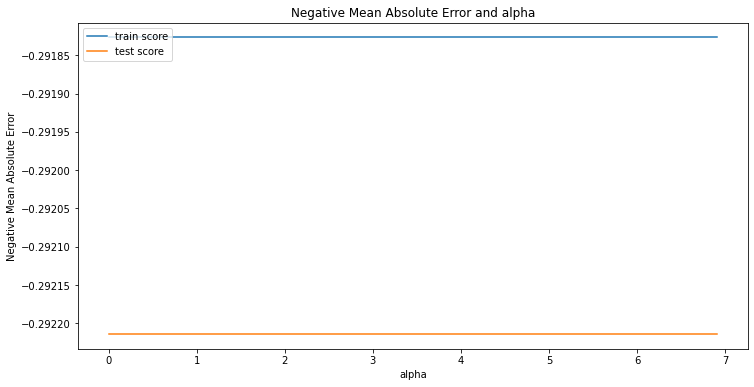

In [187]:
# plotting mean test and train scoes with alpha 
plt.figure(figsize=(12,6))

cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(np.log(cv_results['param_alpha']), cv_results['mean_train_score'])
plt.plot(np.log(cv_results['param_alpha']), cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [188]:
mlasso_cv.best_score_

-0.10247237798321733

In [189]:
mlasso_cv.best_params_.get('alpha')

0.0001

In [190]:
alpha =mlasso_cv.best_params_.get('alpha')

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lasso, y_train)

Lasso(alpha=0.0001)

In [191]:
# predict
y_train_pred = lasso.predict(X_train_lasso)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test_lasso)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8764920396486879
0.8299328546951018


In [192]:
model_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
cols = X_train_lasso.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feature','Coef']

In [167]:
lasso_coef[lasso_coef['Coef']==0]['Feature'].tolist()

['Exterior1st_BrkComm']

In [168]:
lasso_cols = lasso_coef[~(lasso_coef['Coef']==0)]['Feature'].tolist()

In [169]:
len(lasso_cols)

26

In [170]:
lasso_coef[~(lasso_coef['Coef']==0)].sort_values(by='Coef',ascending=False).head(35)

Feature          Coef
0                   BsmtQual  1.132404e+01
25  BsmtFinType2_No Basement  5.265468e-01
22           Functional_Maj2  1.860489e-01
8                MSZoning_RL  1.759324e-01
3               BsmtFullBath  1.728668e-01
1                TotalBsmtSF  1.263471e-01
9       Neighborhood_Edwards  1.173556e-01
7                MSZoning_FV  8.439389e-02
2                  GrLivArea  8.343091e-02
4                 GarageCond  7.264362e-02
5              MSSubClass_30  4.587279e-02
16       Exterior1st_MetalSd  3.859610e-02
14       Exterior1st_HdBoard  3.240573e-02
26     SaleCondition_Partial  4.099285e-17
21              Heating_Wall -1.188885e-02
20       Exterior2nd_Wd Shng -2.255863e-02
17       Exterior1st_Plywood -2.598606e-02
19       Exterior2nd_Wd Sdng -3.948726e-02
15       Exterior1st_ImStucc -5.110831e-02
18       Exterior2nd_Brk Cmn -6.241584e-02
6              MSSubClass_90 -8.224070e-02
10        Neighborhood_SWISU -1.070377e-01
13       Exterior1st_BrkFace -1.656162e-01
11           Condition1_RRNe -1.828437e-01
23            Functional_Mod -2.656999e-01
24  BsmtFinType1_No Basement -4.257349e-01

In [ ]:
pipe = Pipeline([(‘Feature Selection’, rfe), (‘Model’, model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=36851234)
n_scores = cross_val_score(pipe, X_train, y_train, scoring=’accuracy’, cv=cv, n_jobs=-1)
np.mean(n_scores)

In [ ]:
pipe.fit(X_train, y_train)

In [ ]:
from sklearn.feature_selection import RFECVrfecv = RFECV(estimator=GradientBoostingClassifier())

In [ ]:
pipeline = Pipeline([(‘Feature Selection’, rfecv), (‘Model’, model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=36851234)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring=’accuracy’, cv=cv, n_jobs=-1)
np.mean(n_scores)

In [ ]:
pipeline.fit(X_train,y_train)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.xlabel(“Number of features selected”)
plt.ylabel(“Cross validation score (nb of correct classifications)”)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()